In [36]:
#!jt -t chesterish -T
#!jt -r

usage: jt [-h] [-l] [-t THEME] [-f MONOFONT] [-fs MONOSIZE] [-nf NBFONT]
          [-nfs NBFONTSIZE] [-tf TCFONT] [-tfs TCFONTSIZE] [-dfs DFFONTSIZE]
          [-ofs OUTFONTSIZE] [-mathfs MATHFONTSIZE] [-m MARGINS]
          [-cursw CURSORWIDTH] [-cursc CURSORCOLOR] [-cellw CELLWIDTH]
          [-lineh LINEHEIGHT] [-altp] [-altmd] [-altout] [-P] [-T] [-N] [-kl]
          [-vim] [-r] [-dfonts]
jt: error: unrecognized arguments: -H


# Parametros base

Precio promedio(General)
Graficos series de tiempo



Se estudiará primero con el `Tipo_de_Cliente` = **Tradicional** que es el segmento de interes.

Ademas los graficos se presentaran todos para el producto de interes `Y_producto` = __1010078__

In [1]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
#    start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================
start_time_0 = time.time()

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

"""
# Ordenador de escritorio
file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'

"""
#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'

In [3]:
#===================================
# Dicionario 
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

# Intalar paquetes, Abrir data y ajustarla 

## import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

from sklearn.model_selection import train_test_split

In [5]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

## Datos  
Se cargan los datos de
Ventas y la defincion de los productos
Ventas está en `data_v` y despues pasa a ser `data`

Productos estan cargados en `DF_products`


El que combina a ambos `DF_Full`

###  Ventas

In [6]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Ventas'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_V = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)
#elimina una columna en especifico
data_V.drop('Año natural', inplace=True, axis=1)
data_V.head(1)

,Zona de ventas,Zona de ventas.1,Cliente,Cliente.1,Cliente - Local,Cliente - Local.1,Material,Día natural,Kilos Venta KG,Venta Neta,...,Centro.1,Población,Tipo de cliente,Cluster,Segmento,Segmento.1,Categoría Cliente,Zona de reparto,Año Creación,Material Favorito
0,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,09.02.2018,12,13.685,...,Sucursal Lo Espejo,La Pintana,Tradicional,Clásico,50,Cobertura Pequeno SD,Especialista en Proc,1513112010,2007,1010077


In [7]:
data_V[['Material','Kilos Venta KG','Venta Neta','Precio Promedio','Día natural']].head()

,Material,Kilos Venta KG,Venta Neta,Precio Promedio,Día natural
0,1010077,12,13.685,1.190,09.02.2018
1,1010077,12,15.660,1.350,04.05.2018
2,1010077,12,14.388,1.250,22.06.2018
3,1010077,12,12.753,1.090,26.10.2018
4,1010077,12,14.887,1.290,08.03.2019


#### Funcion

In [8]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    for i in df.columns.to_list():
        df=df[df[i].notna()]

    #========================================
    # Funcion para asignar el tipo de cambio
    #----------------------------------------
    def categ_uniq(x):   
        y=str(x)
        y=y[len(y)-3:]
        if(y=='USD'):
            return y
        else:#if(x[len(x)-3:]=='CLP'):
            return 'CLP'

    #df['Unidad Venta']=df['Venta Neta'].apply(categ_uniq)
    #df['Unidad Precio']=df['Precio Promedio'].apply(categ_uniq)



    #==========================================================
    # Cambio de las comas y valores
    #----------------------------------------------------------
    def CLP_Dolar(x):
        x=str(x)
        x=x.replace('.', '')
        x=x.replace(',', '.')
        x=str(x)
        if(x[len(x)-3:]=='USD'):
            x=x.split(' USD')[0]
            x= None
            #x=x*720
        elif(x[len(x)-3:]=='CLP'):
            x=x.split(' CLP')[0]
            x=float(x)
        return x

    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    def delete_asterisco(x):
        x=str(x)
        if(x=='*'):
            x=''
        else:
            x
        return x


#=====================================================
#proceso iterativo:
#=====================================================

    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
    
    # se elimina el punto definido para los miles
        if(i!='Kilos Venta KG'):
            df[i]=df[i].apply(CLP_Dolar)
        else:
            df[i]=df[i].apply(change_num_point)
            # se reemplaza la coma por un punto, para definir los decimales correctamente
            df[i]=df[i].apply(change_num_coma)
        # se elimina el valor * 
        df[i]=df[i].apply(delete_asterisco)
        df=df[df[i].notna()]
        df=df[df[i]!='None']
        df[i]=df[i].astype('float64')
        # Se pasa de ser un str a un int
        print(i)
        #df[i]=df[i].astype('int64')



    #==========================================================================================
    # Ajuste de las fechas
    #-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%d.%m.%Y').date())
        #Separacion fecha
    df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    df['Mes']=df["Día natural"].apply(lambda x: x.month)
    df['Año']=df["Día natural"].apply(lambda x: x.year)

    #df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    end_time = time.time()

    time_convert(end_time - start_time)
    return df

In [9]:
#=====================================
# Aplicacion del ajuste de los datos
#=====================================

data=Ajuste_data(data_V)

Kilos Venta KG
Venta Neta
Precio Promedio
Time Lapsed = 0:0:25.659929990768433 
 H:m:s


### Data Productos 

In [10]:
name_archivo= 'Detalles de los productos'+'.csv'

file_direct=file_direct_Clear+ name_archivo

col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

DF_Products = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)

print(DF_Products.iloc[1,:])

print(DF_Products.shape)
DF_Products=DF_Products[DF_Products['Año natural']=='2021']
print(DF_Products.shape)
DF_Products=DF_Products.reset_index()
DF_Products=DF_Products[['Material',
 'Nivel 4',
 'Nivel 4.1',
 'Sector',
 'Tipo de material',
 'Tipo de material.1',
 'Marca',
 'Nivel 2',
 'Granel/Envasado',
 'Marinado',
 'Nivel 3',
 'Grupo artículos',
 'Estado',
 'Estandar',
 'Envase']]
DF_Products.tail(1)

Sector                                 Cerdo
Tipo de material                        ZCER
Tipo de material.1        Prod. Term. Cerdos
Marca                       SUPER CERDO (SC)
Nivel 2                              Chuleta
Granel/Envasado                       GRANEL
Marinado                            MARINADO
Material                             1020027
Nivel 3                       Chuleta Vetada
Nivel 4                           2002036179
Nivel 4.1             Chuleta Vetada Repasad
Grupo artículos                        02020
Estado                           REFRIGERADO
Estandar                       PESO VARIABLE
Envase                          NO CONGELADO
Año natural                             2019
Kilos Venta KG                     3.615.396
Venta Neta                 6.676.505.142 CLP
Precio Promedio                    1.847 CLP
Name: 1, dtype: object
(52, 19)
(13, 19)


,Material,Nivel 4,Nivel 4.1,Sector,Tipo de material,Tipo de material.1,Marca,Nivel 2,Granel/Envasado,Marinado,Nivel 3,Grupo artículos,Estado,Estandar,Envase
12,1010077,1014022073,Trutro Entero Selección,Pollo,ZAVE,Prod. Term. Ave,SUPER POLLO (SP),Trutro,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO


### Merge con datos

In [11]:
DF_Full=pd.merge(data , DF_Products 
     , how='inner')
print(DF_Full.shape)
print(DF_Full.columns.to_list())

time_convert(time.time()-start_time_0)

DF_Full.head(3)

(1059662, 40)
['Zona de ventas', 'Zona de ventas.1', 'Cliente', 'Cliente.1', 'Cliente - Local', 'Cliente - Local.1', 'Material', 'Día natural', 'Kilos Venta KG', 'Venta Neta', 'Precio Promedio', 'Frecuencia Historica', 'Centro', 'Centro.1', 'Población', 'Tipo de cliente', 'Cluster', 'Segmento', 'Segmento.1', 'Categoría Cliente', 'Zona de reparto', 'Año Creación', 'Material Favorito', 'Semana', 'Mes', 'Año', 'Nivel 4', 'Nivel 4.1', 'Sector', 'Tipo de material', 'Tipo de material.1', 'Marca', 'Nivel 2', 'Granel/Envasado', 'Marinado', 'Nivel 3', 'Grupo artículos', 'Estado', 'Estandar', 'Envase']
Time Lapsed = 0:0:35.641772508621216 
 H:m:s


,Zona de ventas,Zona de ventas.1,Cliente,Cliente.1,Cliente - Local,Cliente - Local.1,Material,Día natural,Kilos Venta KG,Venta Neta,...,Tipo de material.1,Marca,Nivel 2,Granel/Envasado,Marinado,Nivel 3,Grupo artículos,Estado,Estandar,Envase
0,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,2018-02-09,12.0,13685.0,...,Prod. Term. Ave,SUPER POLLO (SP),Trutro,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO
1,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,2018-05-04,12.0,15660.0,...,Prod. Term. Ave,SUPER POLLO (SP),Trutro,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO
2,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,2018-06-22,12.0,14388.0,...,Prod. Term. Ave,SUPER POLLO (SP),Trutro,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO


In [12]:
#Ajuste Material
def material_name(x):
    s1=str(x['Material'])
    s2=str(x['Nivel 4.1'])
    return(s1+'\n ('+s2+')')
#df['Material Nombre']=df.apply(lambda x:  material_name(x), axis=1)
DF_Full['Material Nombre']=DF_Full.apply(lambda x:  material_name(x), axis=1)

# Describe 
La descripcion consta de representaciones graficas de los datos en cuantia como en distribución.

## Cantidad de datos 

__Se evalua__:

-    la cantidad de __clientes de cada canal__

-    La __cantidad de compras promedio__ de cada cliente(Anualmente) por Canal.
    
-    __Productos__ con más __frecuencia__ de compra
    
-    La cantidad de clientes por canal que son atendidos en las distintas sucursales.
    
-    La cantidad de clientes por canal que pertenecen a una poblacion dada

### Cantidad de clientes
- la cantidad de clientes de cada canal
- La cantidad de clientes por canal que son atendidos en las distintas sucursales.
- La cantidad de clientes por canal que pertenecen a una poblacion dada

In [13]:
#================================================
#La cantidad de clientes por canal que son atendidos en las distintas sucursales.
#
#La cantidad de clientes por canal que pertenecen a una poblacion dada
#================================================

df=data.groupby([ 'Población','Centro.1',
              'Tipo de cliente','Cliente'
             ]).count().reset_index().groupby([ 'Población','Centro.1',
              'Tipo de cliente'
             ]).count().reset_index()[['Población','Centro.1',
              'Tipo de cliente','Cliente']]#.head(20)
df=df.rename(columns={'Cliente':'Cantidad de Clientes'})
df.head()

,Población,Centro.1,Tipo de cliente,Cantidad de Clientes
0,Buin,Sucursal Lo Espejo,Foodservice,19
1,Buin,Sucursal Lo Espejo,Tradicional,73
2,Buin,Sucursal Miraflores,Foodservice,21
3,Buin,Sucursal Miraflores,Tradicional,1
4,Calera de Tango,Sucursal Lo Espejo,Foodservice,5


In [14]:
#================================================
#La cantidad de clientes por canal que son atendidos en las distintas sucursales.
#
#La cantidad de clientes por canal que pertenecen a una poblacion dada
#================================================

data.groupby([ 'Población','Centro.1',
              'Tipo de cliente','Cliente'
             ]).count().reset_index().groupby([ 'Población','Centro.1',
              'Tipo de cliente'
             ]).count()


Cliente  Zona de ventas  \
Población       Centro.1            Tipo de cliente                            
Buin            Sucursal Lo Espejo  Foodservice           19              19   
                                    Tradicional           73              73   
                Sucursal Miraflores Foodservice           21              21   
                                    Tradicional            1               1   
Calera de Tango Sucursal Lo Espejo  Foodservice            5               5   
...                                                      ...             ...   
Talagante       Sucursal Lo Espejo  Industriales           1               1   
                                    Tradicional            3               3   
Vitacura        Sucursal Huechuraba Foodservice           54              54   
                                    Tradicional            2               2   
                Sucursal Miraflores Foodservice            1               1   

                                                     Zona de ventas.1  \
Población       Centro.1            Tipo de cliente                     
Buin            Sucursal Lo Espejo  Foodservice                    19   
                                    Tradicional                    73   
                Sucursal Miraflores Foodservice                    21   
                                    Tradicional                     1   
Calera de Tango Sucursal Lo Espejo  Foodservice                     5   
...                                                               ...   
Talagante       Sucursal Lo Espejo  Industriales                    1   
                                    Tradicional                     3   
Vitacura        Sucursal Huechuraba Foodservice                    54   
                                    Tradicional                     2   
                Sucursal Miraflores Foodservice                     1   

                                                     Cliente.1  \
Población       Centro.1            Tipo de cliente              
Buin            Sucursal Lo Espejo  Foodservice             19   
                                    Tradicional             73   
                Sucursal Miraflores Foodservice             21   
                                    Tradicional              1   
Calera de Tango Sucursal Lo Espejo  Foodservice              5   
...                                                        ...   
Talagante       Sucursal Lo Espejo  Industriales             1   
                                    Tradicional              3   
Vitacura        Sucursal Huechuraba Foodservice             54   
                                    Tradicional              2   
                Sucursal Miraflores Foodservice              1   

                                                     Cliente - Local  \
Población       Centro.1            Tipo de cliente                    
Buin            Sucursal Lo Espejo  Foodservice                   19   
                                    Tradicional                   73   
                Sucursal Miraflores Foodservice                   21   
                                    Tradicional                    1   
Calera de Tango Sucursal Lo Espejo  Foodservice                    5   
...                                                              ...   
Talagante       Sucursal Lo Espejo  Industriales                   1   
                                    Tradicional                    3   
Vitacura        Sucursal Huechuraba Foodservice                   54   
                                    Tradicional                    2   
                Sucursal Miraflores Foodservice                    1   

                                                     Cliente - Local.1  \
Población       Centro.1            Tipo de cliente                      
Buin            Sucursal Lo Espejo  Foodservice                     19   
                                    Tradicio

Foodservice
Tradicional
Grandes Clientes
Industriales
Foodservice
Tradicional
Grandes Clientes
Industriales


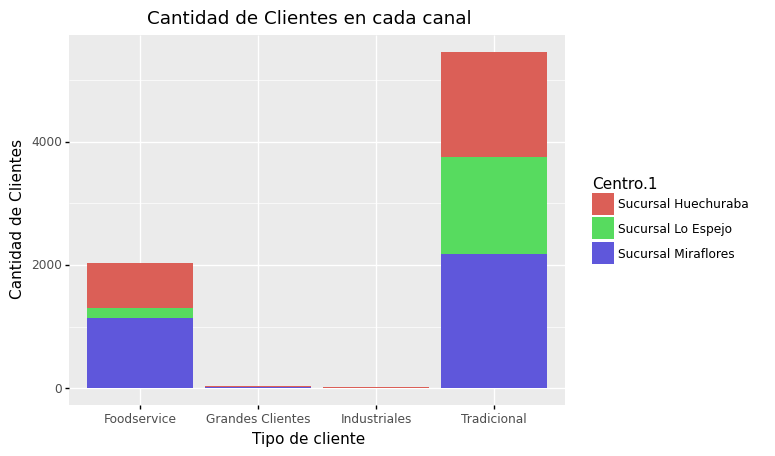

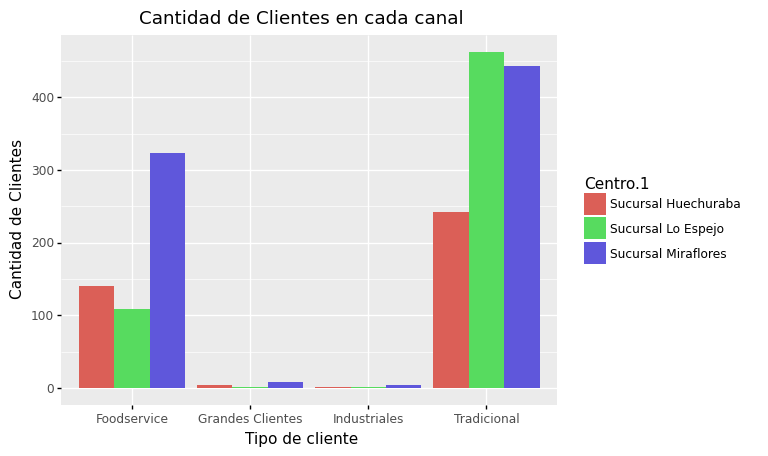

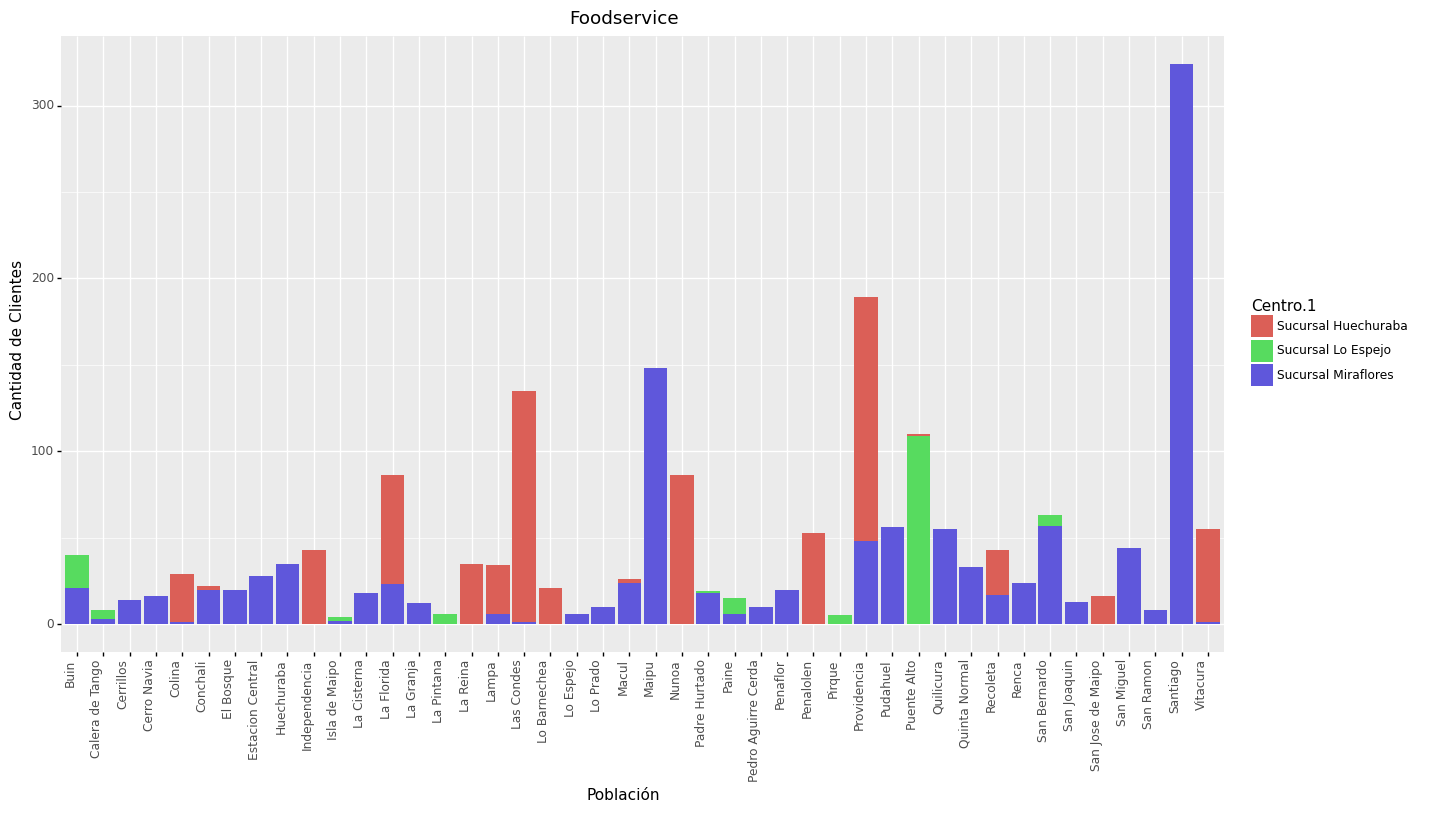

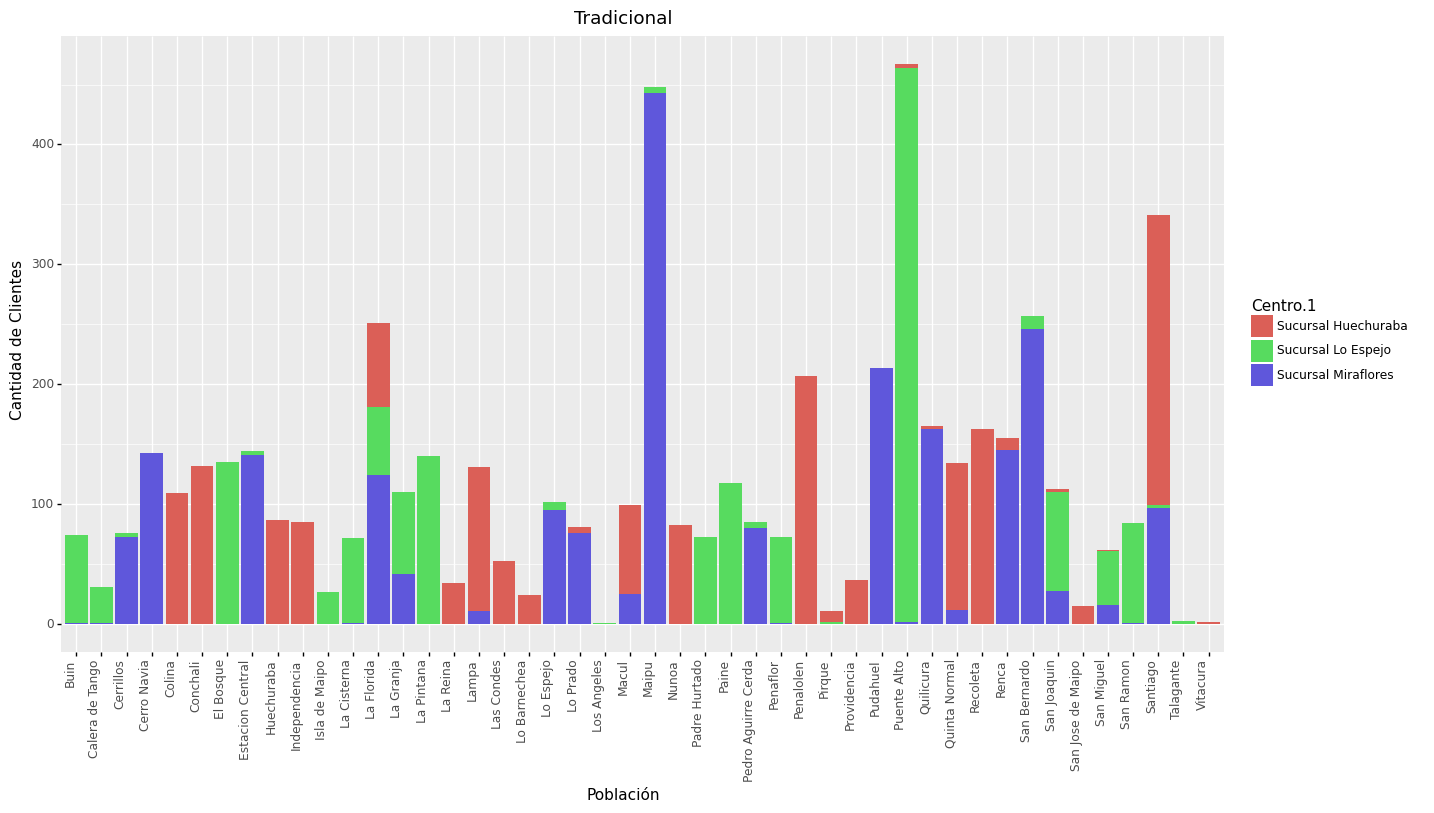

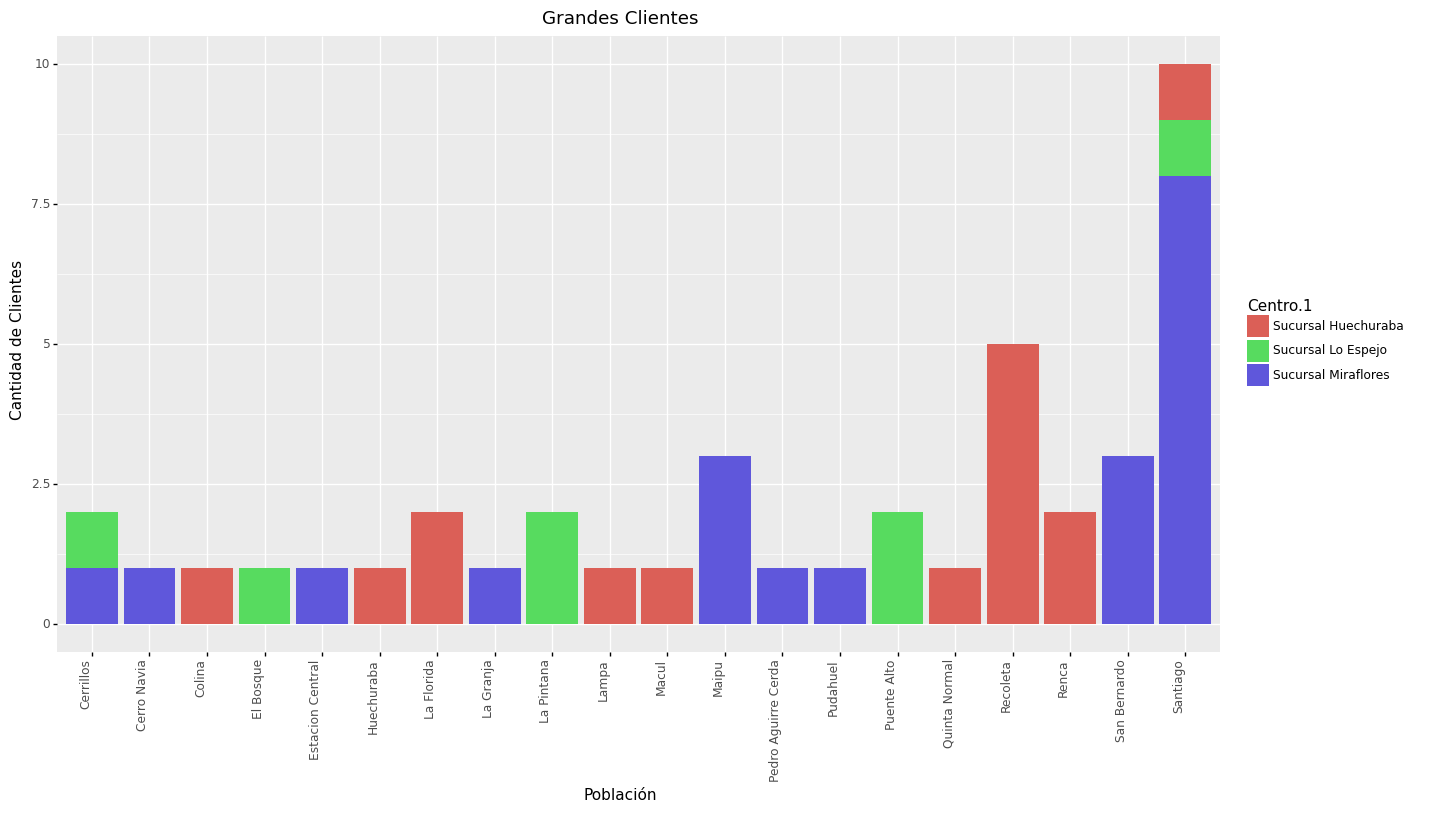

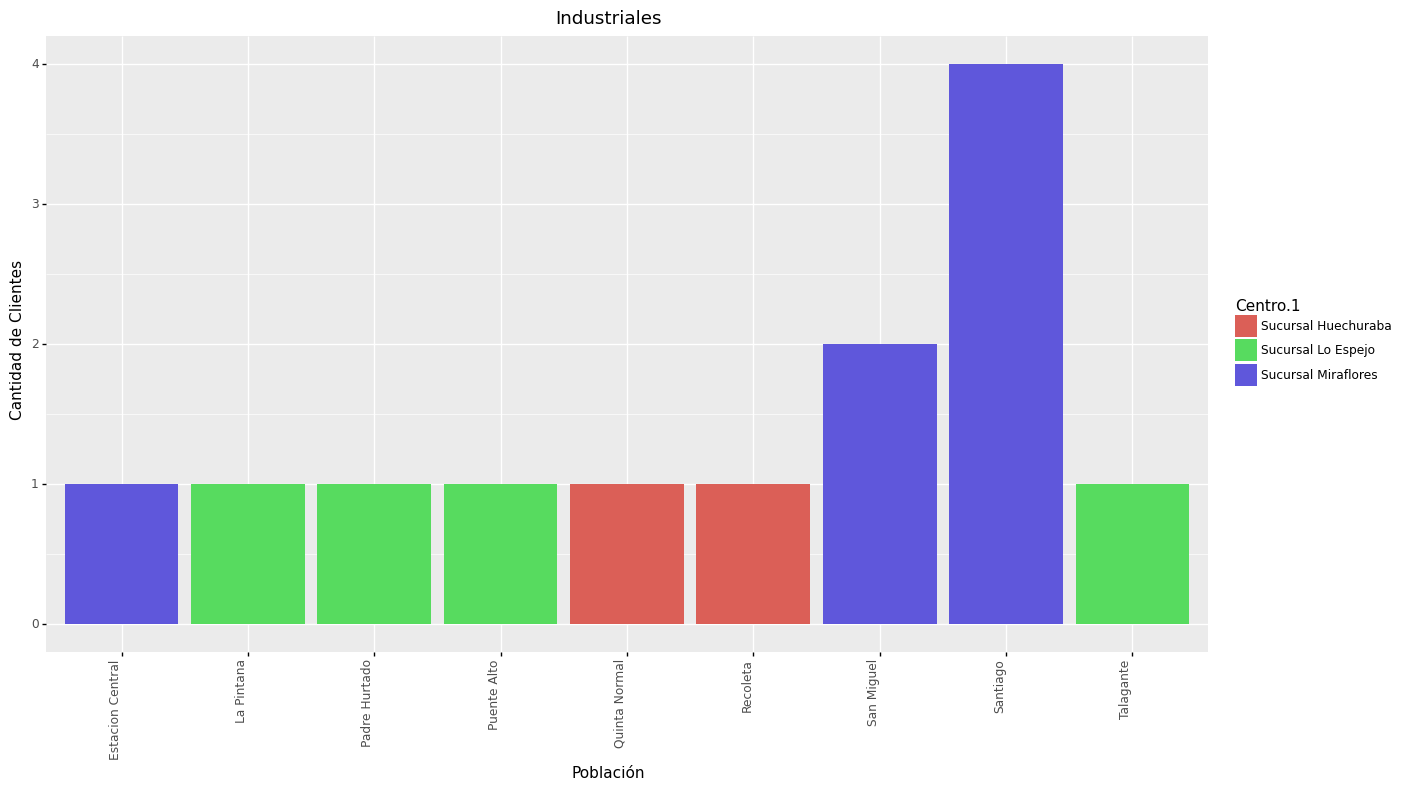

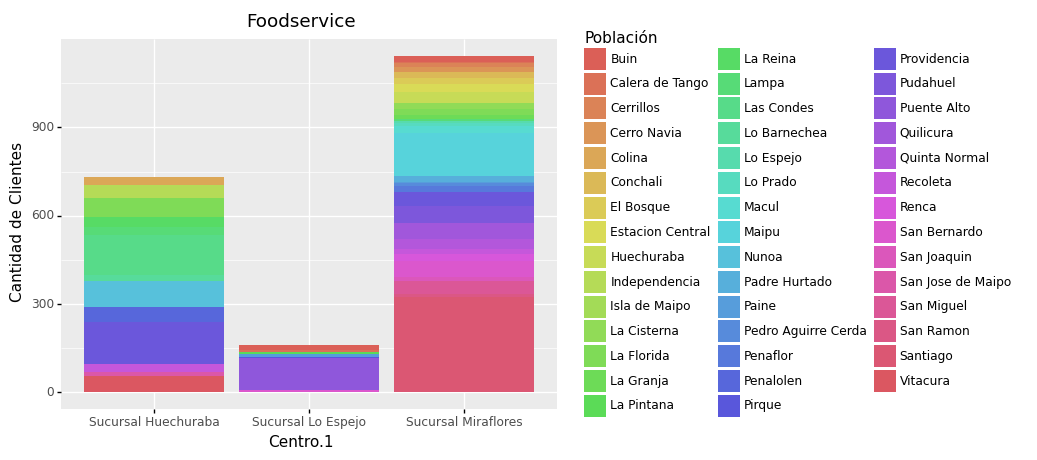

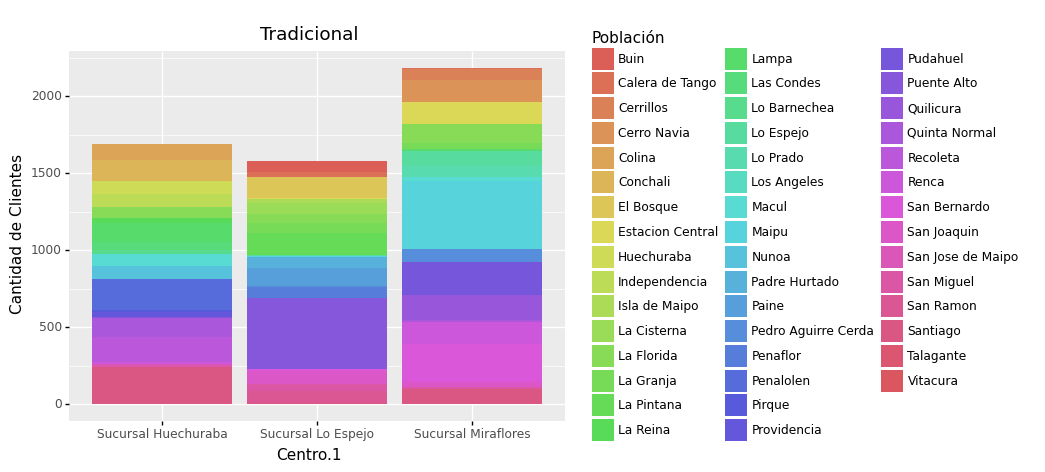

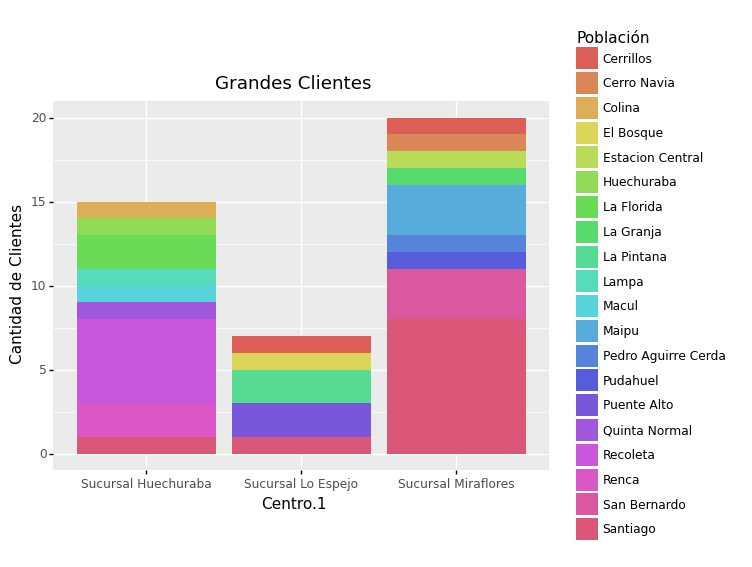

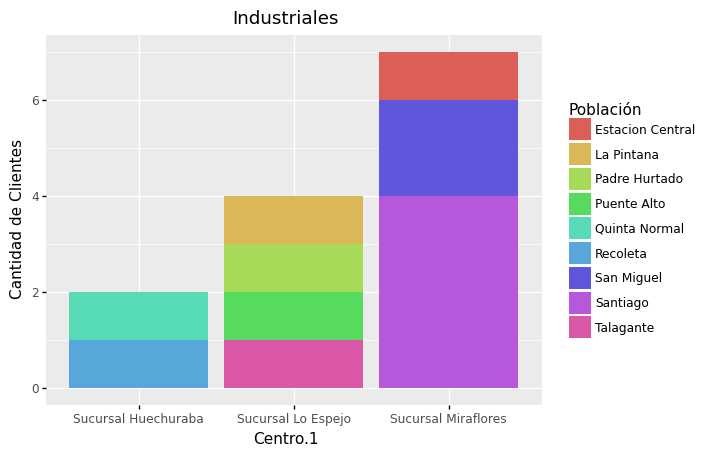

[<ggplot: (145547789306)>,
 <ggplot: (145547740877)>,
 <ggplot: (145547710763)>,
 <ggplot: (145547671805)>,
 <ggplot: (145547645043)>,
 <ggplot: (145547602685)>,
 <ggplot: (145547604947)>,
 <ggplot: (145547604848)>,
 <ggplot: (145547673968)>,
 <ggplot: (145547734995)>]

In [15]:
#dodge_text = position_dodge(width=0.9)
list_ggplot=[]
list_ggplot.append(ggplot(df, aes(x='Tipo de cliente', y='Cantidad de Clientes', fill='Centro.1'))
     
        + geom_col(stat='identity',show_legend=True)
                   
        +ggtitle('Cantidad de Clientes en cada canal')
                  )

list_ggplot.append(ggplot(df, aes(x='Tipo de cliente', y='Cantidad de Clientes', fill='Centro.1'))
     
        + geom_col(position='dodge',show_legend=True)
                   
        +ggtitle('Cantidad de Clientes en cada canal')
                  )

for i in df['Tipo de cliente'].unique():
    print(i)
    list_ggplot.append(
        
        ggplot(df[df['Tipo de cliente']==i], aes(x='Población', y='Cantidad de Clientes', fill='Centro.1'))
         + geom_col()
        +ggtitle(i)
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(15,8))
        
    )

for i in df['Tipo de cliente'].unique():
    print(i)
    list_ggplot.append(ggplot(df[df['Tipo de cliente']==i], aes(x='Centro.1', y='Cantidad de Clientes', fill='Población'))
     + geom_col()+ggtitle(i)
    )
    
list_ggplot

#### Cantidad de clientes por compras

In [16]:
#================================================
#Productos con más frecuencia de compra.
#================================================

df=data.groupby(['Material','Tipo de cliente','Centro.1','Cliente'
             ]).count().reset_index().groupby([ 'Material','Tipo de cliente','Centro.1',
             ]).count().reset_index()[[ 'Tipo de cliente','Centro.1','Material','Día natural']]
df=df.rename(columns={'Día natural':'Cantidad de clientes'})
df.head()

,Tipo de cliente,Centro.1,Material,Cantidad de clientes
0,Foodservice,Sucursal Huechuraba,1010002,41
1,Foodservice,Sucursal Lo Espejo,1010002,20
2,Foodservice,Sucursal Miraflores,1010002,144
3,Grandes Clientes,Sucursal Huechuraba,1010002,14
4,Grandes Clientes,Sucursal Lo Espejo,1010002,6


In [17]:
#Ajuste Material
def material_name(x):
    s1=str(x['Material'])
    s2=str(x['Nivel 4.1'])
    return(s1+'\n ('+s2+')')
#df['Material Nombre']=df.apply(lambda x:  material_name(x), axis=1)
DF_Full['Material Nombre']=DF_Full.apply(lambda x:  material_name(x), axis=1)

In [18]:
#==================
# Con Centro
#==================

df=DF_Full.groupby(['Material Nombre','Tipo de cliente','Centro.1','Cliente'
             ]).count().reset_index().groupby([ 'Material Nombre','Tipo de cliente','Centro.1',
             ]).count().reset_index()[[ 'Tipo de cliente','Centro.1','Material Nombre','Día natural']]
df=df.rename(columns={'Día natural':'Cantidad de clientes'})
df.head()

,Tipo de cliente,Centro.1,Material Nombre,Cantidad de clientes
0,Foodservice,Sucursal Huechuraba,1010002\n (Con Menudencia >2.130),41
1,Foodservice,Sucursal Lo Espejo,1010002\n (Con Menudencia >2.130),20
2,Foodservice,Sucursal Miraflores,1010002\n (Con Menudencia >2.130),144
3,Grandes Clientes,Sucursal Huechuraba,1010002\n (Con Menudencia >2.130),14
4,Grandes Clientes,Sucursal Lo Espejo,1010002\n (Con Menudencia >2.130),6


In [19]:


df=DF_Full.groupby(['Material Nombre','Tipo de cliente','Cliente'
             ]).count().reset_index().groupby([ 'Material Nombre','Tipo de cliente'
             ]).count().reset_index()[[ 'Tipo de cliente','Material Nombre','Día natural']]
df=df.rename(columns={'Día natural':'Cantidad de clientes'})
df.head()

,Tipo de cliente,Material Nombre,Cantidad de clientes
0,Foodservice,1010002\n (Con Menudencia >2.130),205
1,Grandes Clientes,1010002\n (Con Menudencia >2.130),40
2,Industriales,1010002\n (Con Menudencia >2.130),2
3,Tradicional,1010002\n (Con Menudencia >2.130),2284
4,Foodservice,1010048\n (Pechuga Entera Selección),969


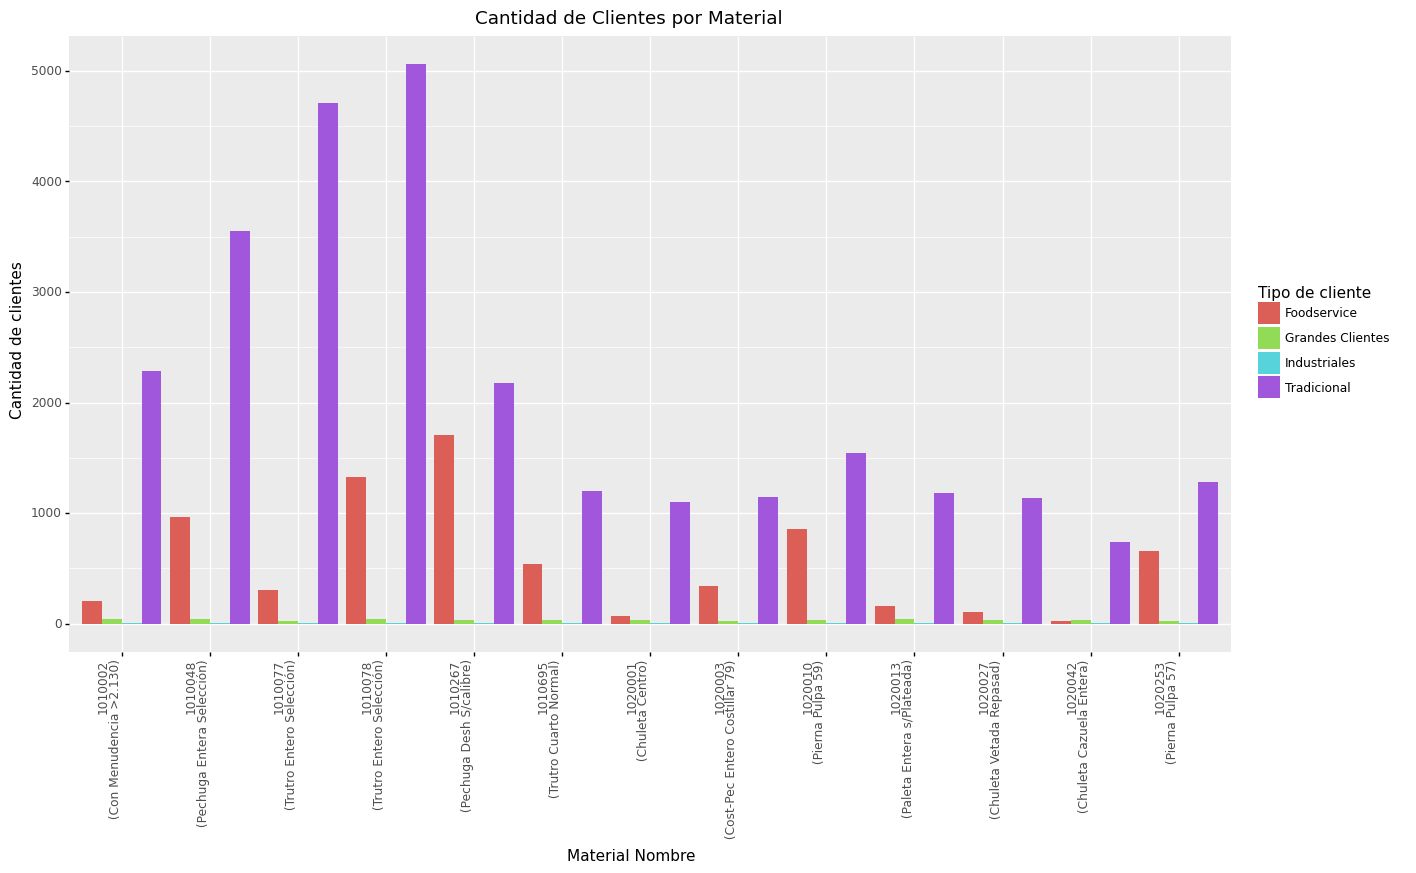

<ggplot: (145573298426)>

In [20]:
#list_ggplot=[]
list_ggplot.append\
(ggplot(df, aes(x='Material Nombre', y='Cantidad de clientes', fill='Tipo de cliente'))
     
        + geom_col(position='dodge',show_legend=True)
                   
        +ggtitle('Cantidad de Clientes'+ ' por Material ')
        
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(15,8))
                  )
list_ggplot[len(list_ggplot)-1]

#### Cantidad de clientes por año 

In [21]:
data.head(1)

,Zona de ventas,Zona de ventas.1,Cliente,Cliente.1,Cliente - Local,Cliente - Local.1,Material,Día natural,Kilos Venta KG,Venta Neta,...,Cluster,Segmento,Segmento.1,Categoría Cliente,Zona de reparto,Año Creación,Material Favorito,Semana,Mes,Año
0,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,2018-02-09,12.0,13685.0,...,Clásico,50,Cobertura Pequeno SD,Especialista en Proc,1513112010,2007,1010077,6,2,2018


In [22]:
DF_Full.columns

Index(['Zona de ventas', 'Zona de ventas.1', 'Cliente', 'Cliente.1',
       'Cliente - Local', 'Cliente - Local.1', 'Material', 'Día natural',
       'Kilos Venta KG', 'Venta Neta', 'Precio Promedio',
       'Frecuencia Historica', 'Centro', 'Centro.1', 'Población',
       'Tipo de cliente', 'Cluster', 'Segmento', 'Segmento.1',
       'Categoría Cliente', 'Zona de reparto', 'Año Creación',
       'Material Favorito', 'Semana', 'Mes', 'Año', 'Nivel 4', 'Nivel 4.1',
       'Sector', 'Tipo de material', 'Tipo de material.1', 'Marca', 'Nivel 2',
       'Granel/Envasado', 'Marinado', 'Nivel 3', 'Grupo artículos', 'Estado',
       'Estandar', 'Envase', 'Material Nombre'],
      dtype='object')

In [23]:
#data_fecha_medio= data_fecha_medio[data_fecha_medio['Precio Promedio'].notna()]
#print(len(data_fecha_medio['Material Nombre'].unique()))


In [24]:
#Agrupación de cantidad de productos que compra al año
df_C=DF_Full.groupby(['Tipo de cliente','Cliente','Año']).count().reset_index()
df_C=df_C[['Tipo de cliente', 'Cliente', 'Año', 'Material']]
df_C=df_C[df_C.Material>0]

#Cantidad de clientes que han comprado en cada año 
df_C=df_C.groupby(['Tipo de cliente','Año']).count().reset_index()
df_C=df_C[['Tipo de cliente', 'Año', 'Cliente']]
#Cambio de nombre
df_C=df_C.rename(columns={'Cliente': 'Cantidad de clientes'})
df_C.head()

,Tipo de cliente,Año,Cantidad de clientes
0,Foodservice,2018,808
1,Foodservice,2019,1105
2,Foodservice,2020,1707
3,Foodservice,2021,2037
4,Grandes Clientes,2018,36


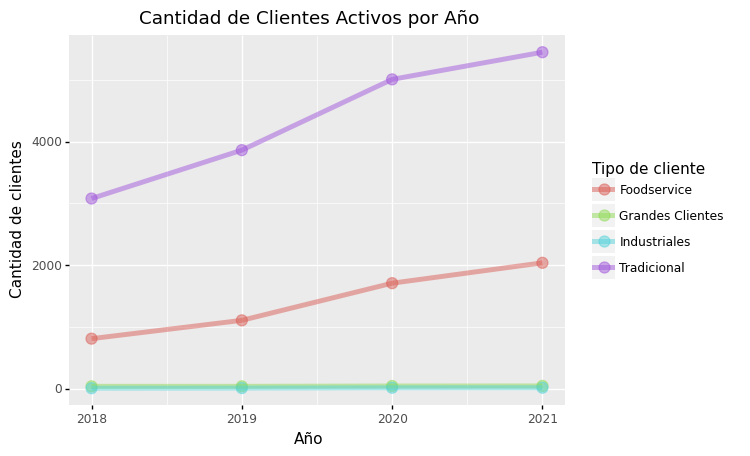

<ggplot: (145573169225)>

In [25]:
ggplot(df_C,
       aes(y='Cantidad de clientes',x='Año',color='Tipo de cliente'))\
+geom_point(size=4, alpha=0.5)\
+geom_line(size=2, alpha=0.5)\
+ggtitle('Cantidad de Clientes Activos por Año')

In [26]:
 df_C.Año.unique()

array([2018, 2019, 2020, 2021], dtype=int64)

In [27]:
df_C
s='Foodservice'

for s in df_C['Tipo de cliente'].unique():
    print(s)
    delta=[]
    for i in [2018, 2019, 2020]:
        
        x_i=df_C[df_C['Tipo de cliente']==s]
        """

        print(x_i[x_i.Año==i].iloc[0],x_i[x_i.Año==(i+1)].iloc[0]
             ,'\n ---------------------------------------------------------------------'
             )
        print(x_i[x_i.Año==i]['Cantidad de clientes'].iloc[0],x_i[x_i.Año==(i+1)]['Cantidad de clientes'].iloc[0])
        """
        delta.append((x_i[x_i.Año==(i+1)]['Cantidad de clientes'].iloc[0] 
                      - x_i[x_i.Año==i]['Cantidad de clientes'].iloc[0])
                    )
    print(delta)
    print(np.mean(delta))
    
print(delta)
print(np.mean(delta))


Foodservice
[297, 602, 330]
409.6666666666667
Grandes Clientes
[0, 5, 1]
2.0
Industriales
[2, 5, 1]
2.6666666666666665
Tradicional
[784, 1147, 440]
790.3333333333334
[784, 1147, 440]
790.3333333333334


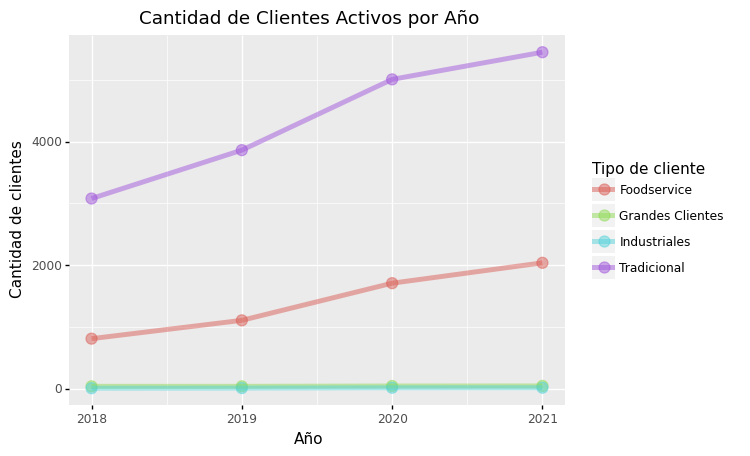

<ggplot: (145572956413)>

In [28]:
list_ggplot.append(
ggplot(df_C,
       aes(y='Cantidad de clientes',x='Año',color='Tipo de cliente'))\
+geom_point(size=4, alpha=0.5)\
+geom_line(size=2, alpha=0.5)\
+ggtitle('Cantidad de Clientes Activos por Año')
)#append
list_ggplot[len(list_ggplot)-1]

#### PDF save

In [29]:
start_time = time.time()
save_as_pdf_pages(list_ggplot,file_direct_Graphic+'/Generales/'+"/Graficos Cantidad de clientes.pdf")
time_convert(time.time()-start_time)

C:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/rolft/Documents/Repositorios/Graficos/Generales//Graficos Cantidad de clientes.pdf


Time Lapsed = 0:0:10.888468027114868 
 H:m:s


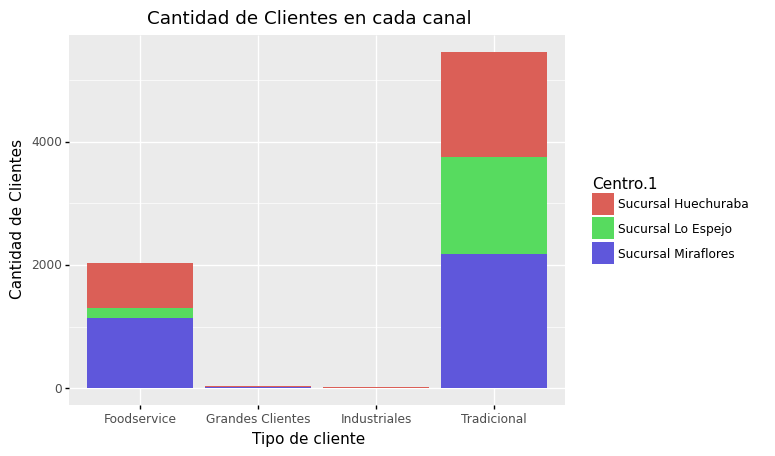

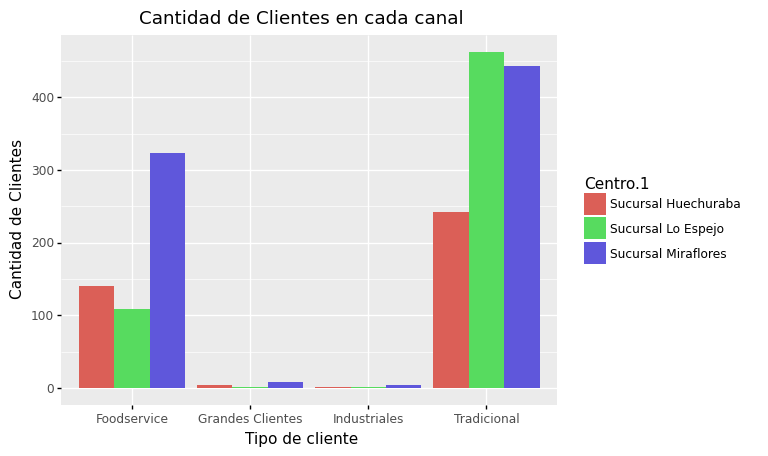

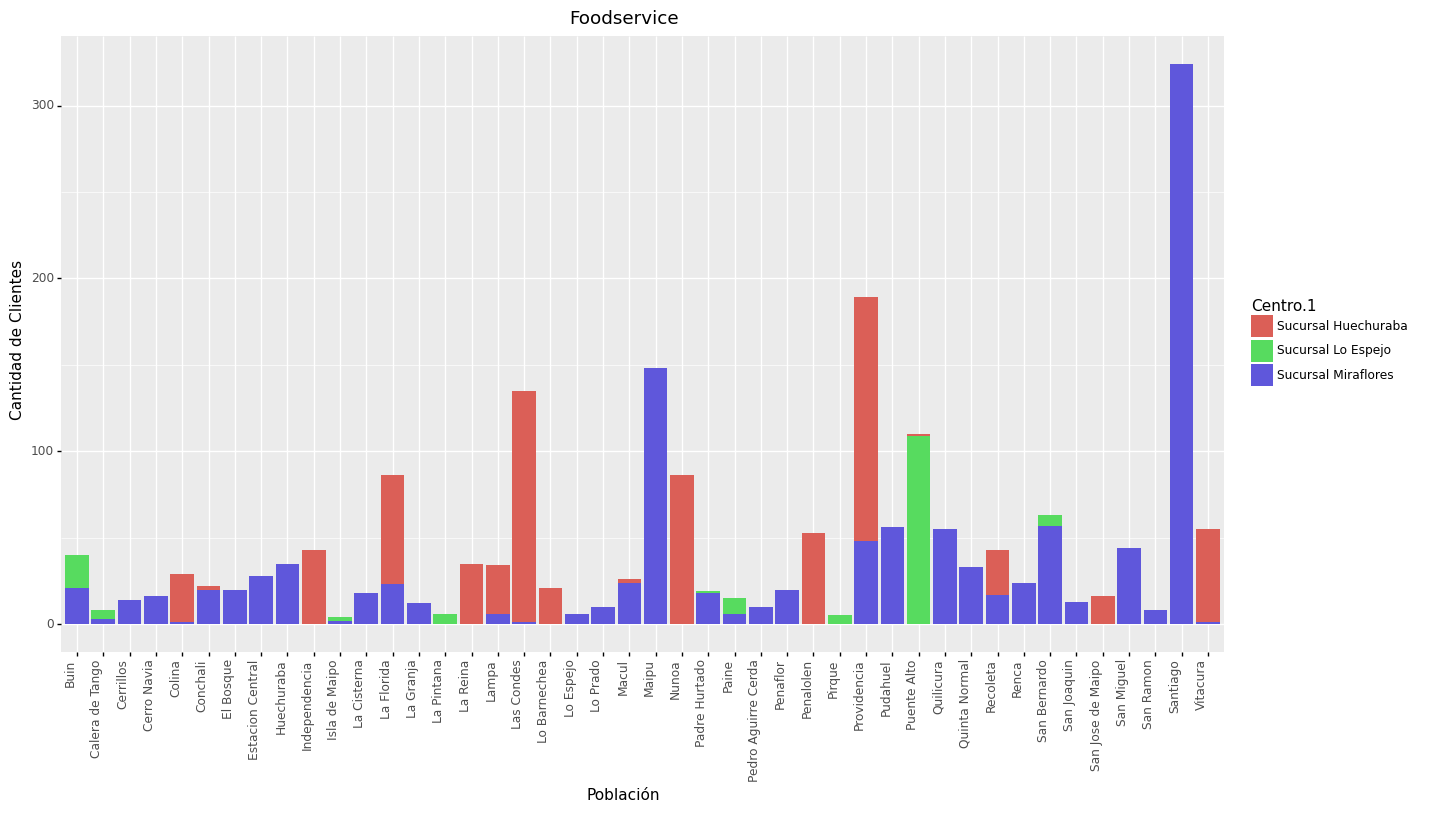

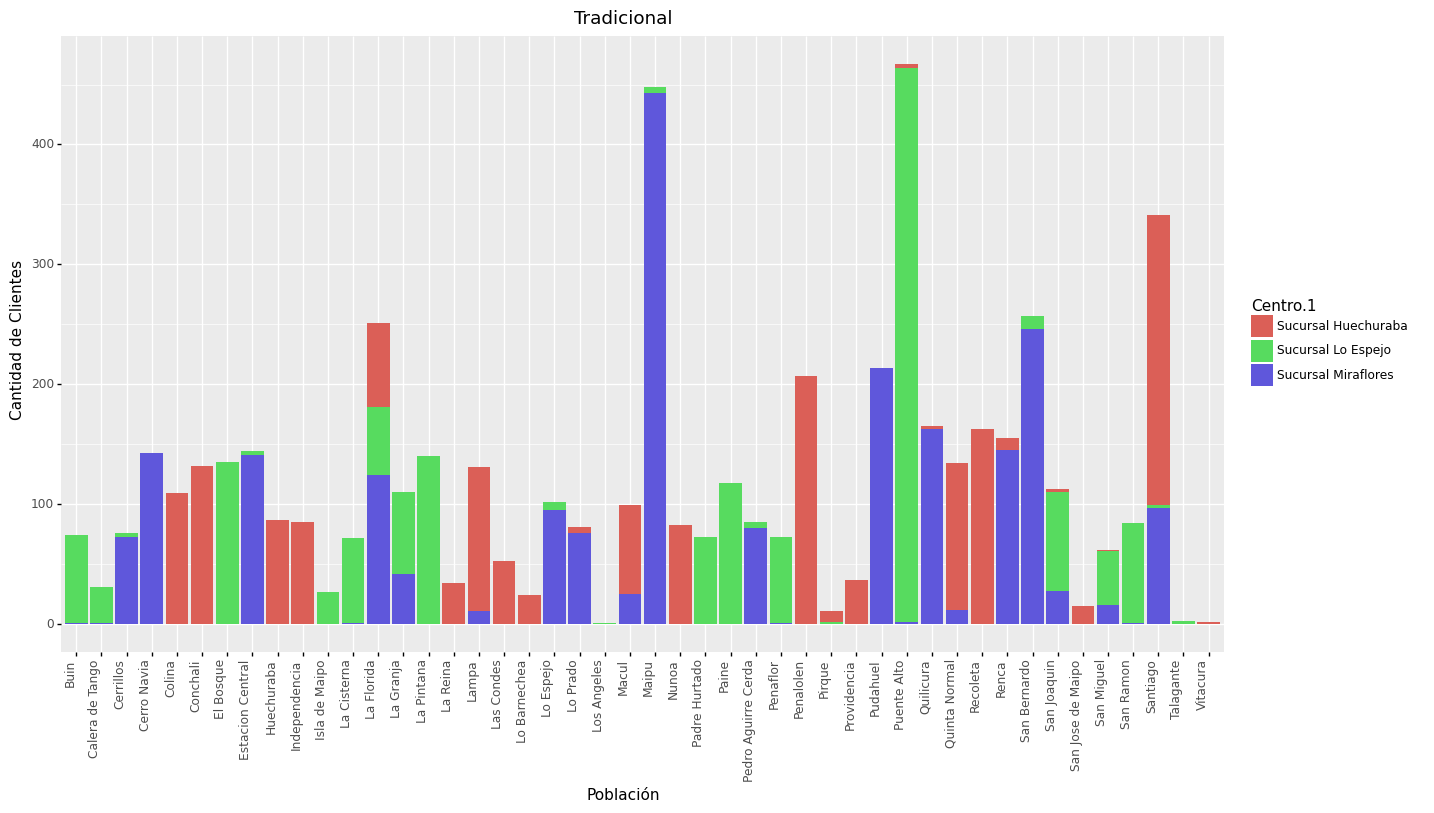

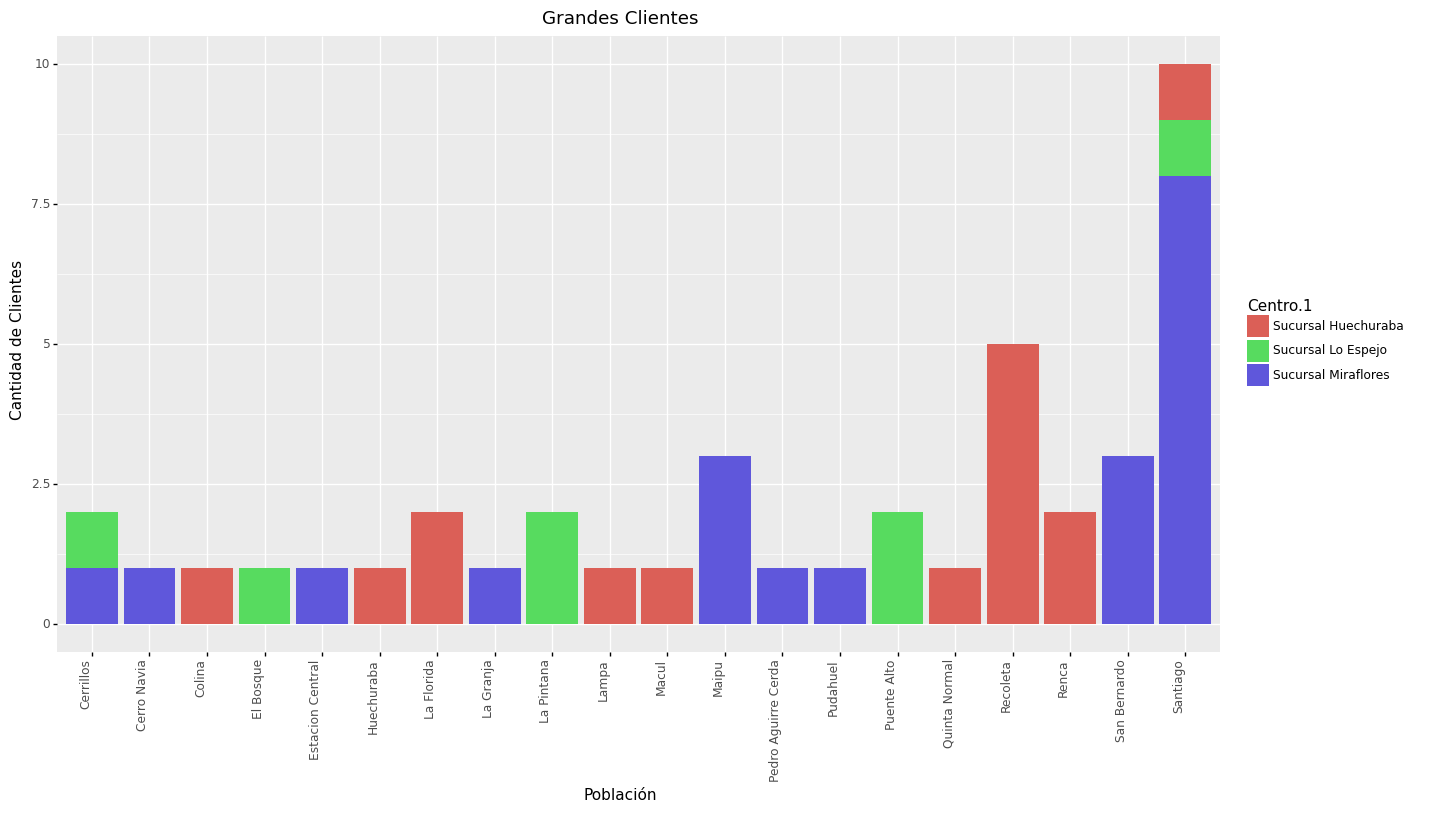

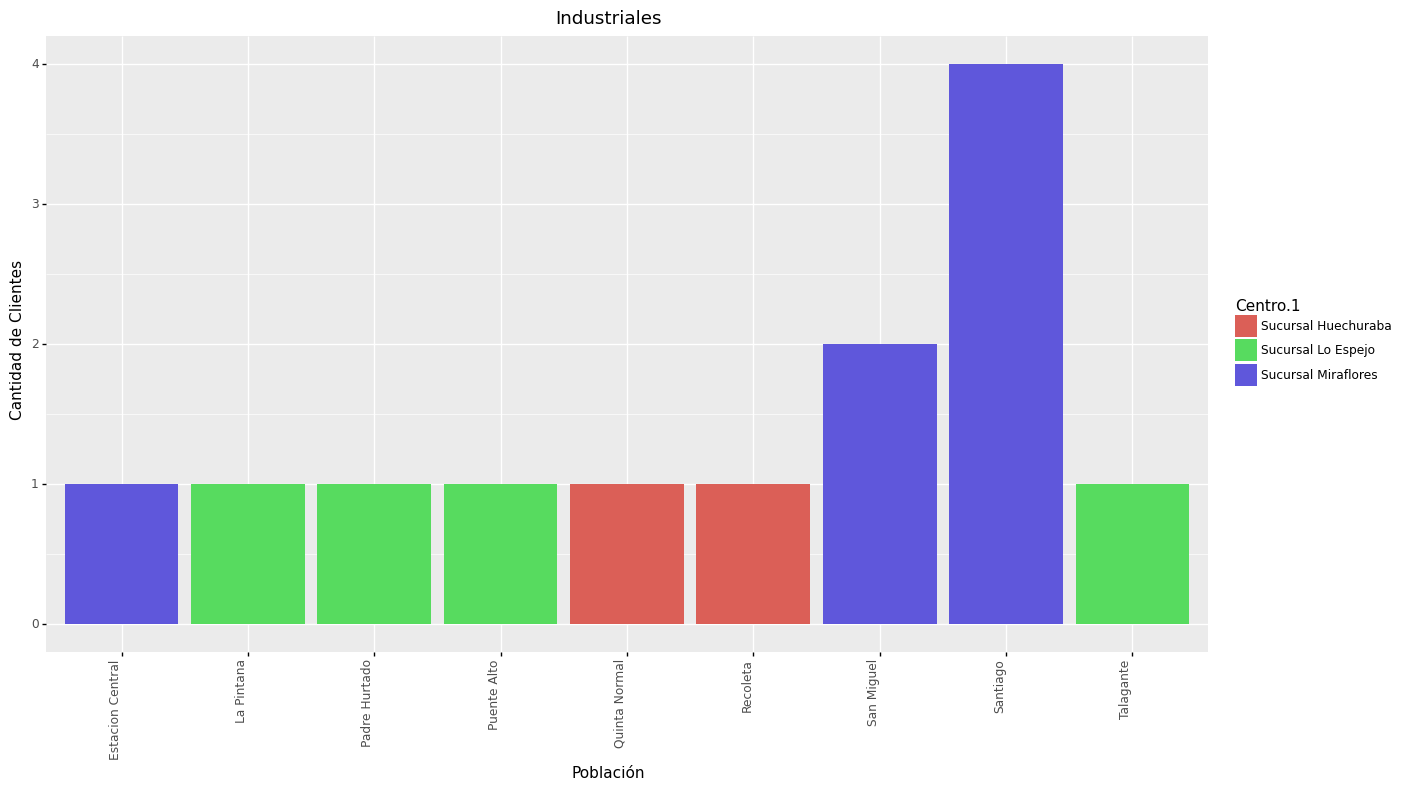

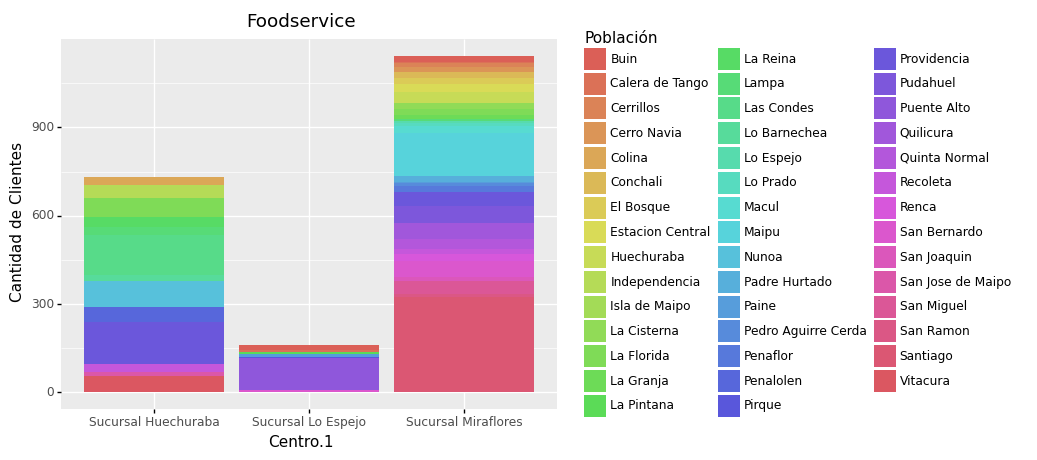

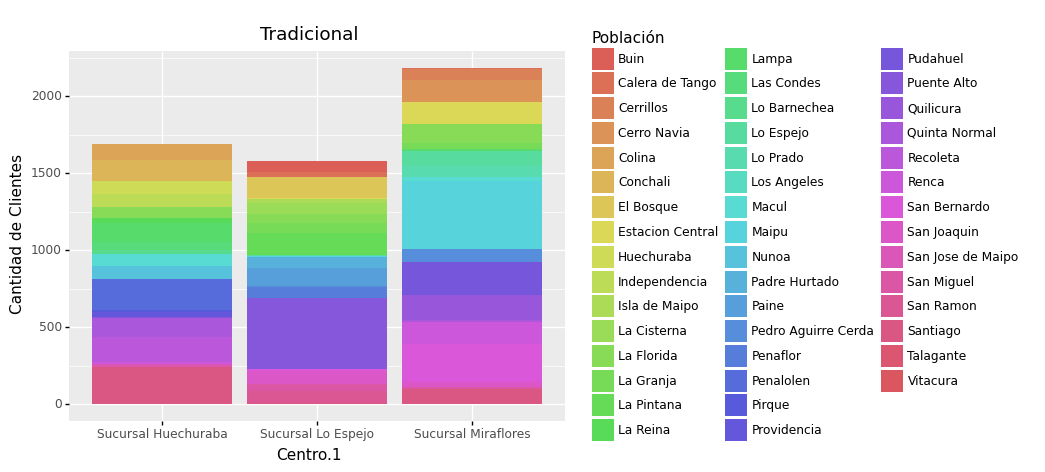

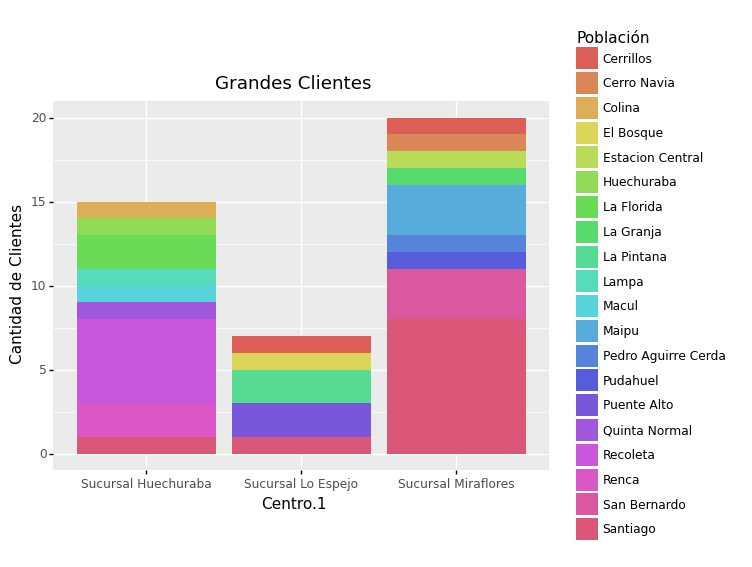

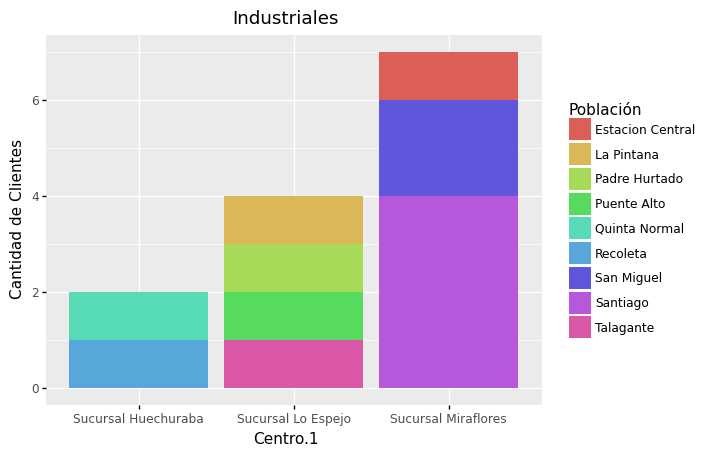

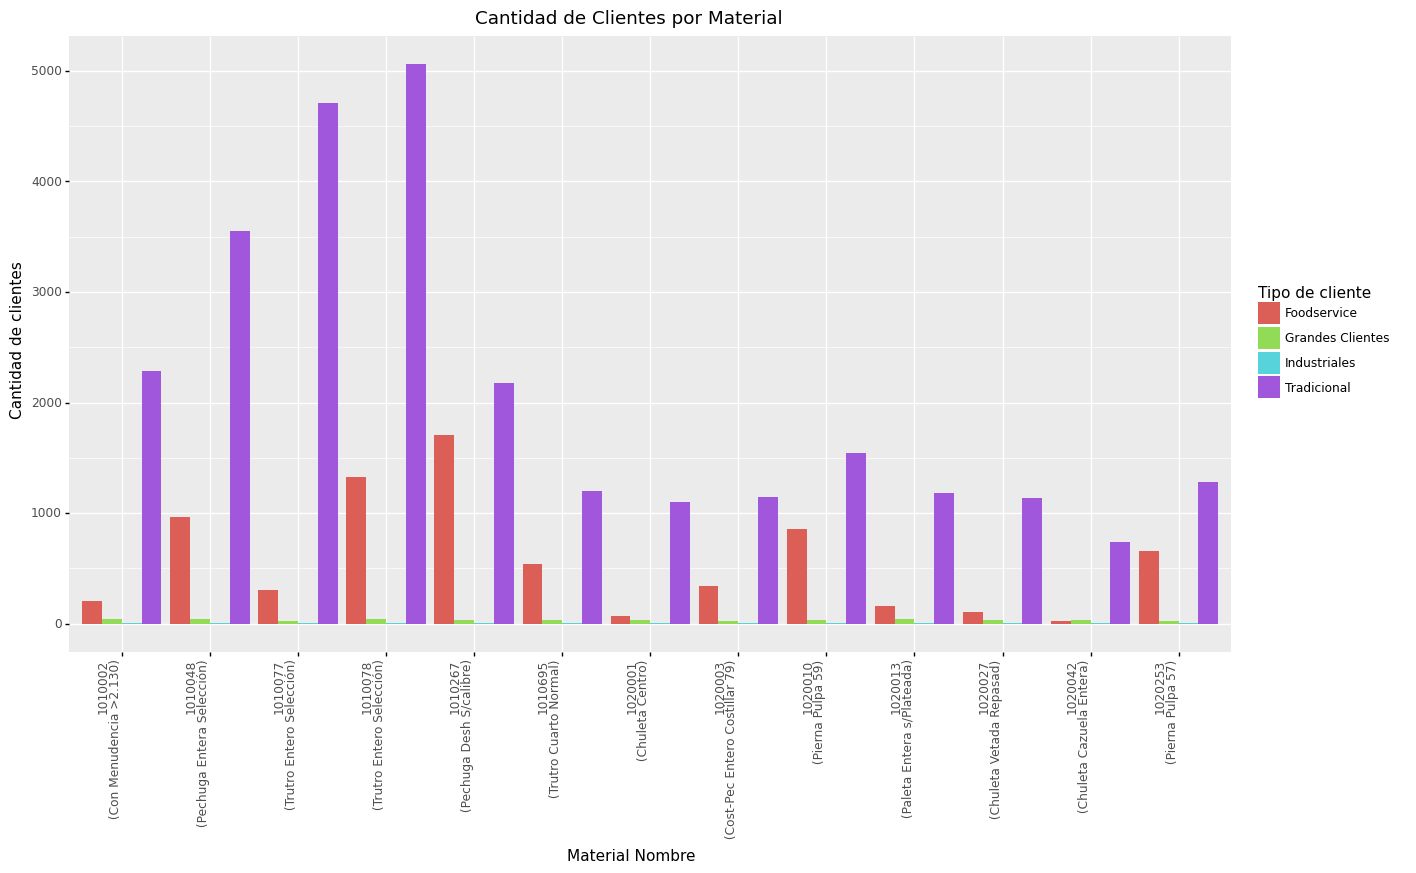

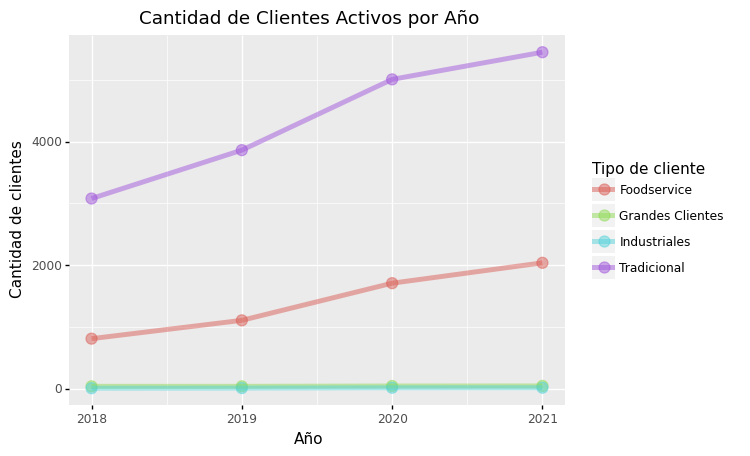

[<ggplot: (145547789306)>,
 <ggplot: (145547740877)>,
 <ggplot: (145547710763)>,
 <ggplot: (145547671805)>,
 <ggplot: (145547645043)>,
 <ggplot: (145547602685)>,
 <ggplot: (145547604947)>,
 <ggplot: (145547604848)>,
 <ggplot: (145547673968)>,
 <ggplot: (145547734995)>,
 <ggplot: (145573298426)>,
 <ggplot: (145572956413)>]

In [30]:
list_ggplot

###  Frecuencia de compra
La cantidad de compras promedio de cada cliente(Anualmente) por Canal.

Productos con más frecuencia de compra

__Fijarse que la frecuencia d compra mensual, no deberia sobrepasar los dias que tiene el mes__
Error surge ya que junta las compras de aos distintas como si fueran realizadas en el mismo año. a causa de no segmentar en un paso por año. previo a calcular el proemdio

In [67]:
#================================================
#La cantidad de compras promedio de cada cliente(Anualmente) por Canal.
#================================================

data.groupby(['Tipo de cliente','Centro.1',
              'Cliente','Día natural'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Centro.1','Cliente'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Centro.1']).mean()

Día natural  Zona de ventas  \
Tipo de cliente  Centro.1                                           
Foodservice      Sucursal Huechuraba    63.767978       63.767978   
                 Sucursal Lo Espejo     57.153005       57.153005   
                 Sucursal Miraflores    64.936945       64.936945   
Grandes Clientes Sucursal Huechuraba   343.642857      343.642857   
                 Sucursal Lo Espejo    463.625000      463.625000   
                 Sucursal Miraflores   237.631579      237.631579   
Industriales     Sucursal Huechuraba    88.000000       88.000000   
                 Sucursal Lo Espejo     28.000000       28.000000   
                 Sucursal Miraflores    25.714286       25.714286   
Tradicional      Sucursal Huechuraba    71.490288       71.490288   
                 Sucursal Lo Espejo     71.231150       71.231150   
                 Sucursal Miraflores    84.930938       84.930938   

                                      Zona de ventas.1   Cliente.1  \
Tipo de cliente  Centro.1                                            
Foodservice      Sucursal Huechuraba         63.767978   63.767978   
                 Sucursal Lo Espejo          57.153005   57.153005   
                 Sucursal Miraflores         64.936945   64.936945   
Grandes Clientes Sucursal Huechuraba        343.642857  343.642857   
                 Sucursal Lo Espejo         463.625000  463.625000   
                 Sucursal Miraflores        237.631579  237.631579   
Industriales     Sucursal Huechuraba         88.000000   88.000000   
                 Sucursal Lo Espejo          28.000000   28.000000   
                 Sucursal Miraflores         25.714286   25.714286   
Tradicional      Sucursal Huechuraba         71.490288   71.490288   
                 Sucursal Lo Espejo          71.231150   71.231150   
                 Sucursal Miraflores         84.930938   84.930938   

                                      Cliente - Local  Cliente - Local.1  \
Tipo de cliente  Centro.1                                                  
Foodservice      Sucursal Huechuraba        63.767978          63.767978   
                 Sucursal Lo Espejo         57.153005          57.153005   
                 Sucursal Miraflores        64.936945          64.936945   
Grandes Clientes Sucursal Huechuraba       343.642857         343.642857   
                 Sucursal Lo Espejo        463.625000         463.625000   
                 Sucursal Miraflores       237.631579         237.631579   
Industriales     Sucursal Huechuraba        88.000000          88.000000   
                 Sucursal Lo Espejo         28.000000          28.000000   
                 Sucursal Miraflores        25.714286          25.714286   
Tradicional      Sucursal Huechuraba        71.490288          71.490288   
                 Sucursal Lo Espejo         71.231150          71.231150   
                 Sucursal Miraflores        84.930938          84.930938   

                                        Material  Kilos Venta KG  Venta Neta  \
Tipo de cliente  Centro.1                                                      
Foodservice      Sucursal Huechuraba   63.767978       63.767978   63.767978   
                 Sucursal Lo Espejo    57.153005       57.153005   57.153005   
                 Sucursal Miraflores   64.936945       64.936945   64.936945   
Grandes Clientes Sucursal Huechuraba  343.642857      343.642857  343.642857   
                 Sucursal Lo Espejo   463.625000      463.625000  463.625000   
                 Sucursal Miraflores  237.631579      237.631579  237.631579   
Industriales     Sucursal Huechuraba   88.000000       88.000000   88.000000   
                 Sucursal Lo Espejo    28.000000       28.000000   28.000000   
                 Sucursal Miraflores   25.714286       25.714286   25.714286   
Tradicional      Sucursal Huechuraba   71.490288       71.490288   71.490288   
                 Sucursal Lo Espejo    71.231150       71.231150 

In [68]:
#================================================
#La cantidad de compras promedio de cada cliente(Anualmente) por Canal.
#================================================

df=data.groupby(['Tipo de cliente','Centro.1',
              'Cliente','Día natural'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Centro.1','Cliente'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Centro.1']).mean().reset_index()[['Centro.1',
              'Tipo de cliente','Día natural']]#.head(20)
df=df.rename(columns={'Día natural':'Frecuencia historica promedio'})
df.head()

,Centro.1,Tipo de cliente,Frecuencia historica promedio
0,Sucursal Huechuraba,Foodservice,63.767978
1,Sucursal Lo Espejo,Foodservice,57.153005
2,Sucursal Miraflores,Foodservice,64.936945
3,Sucursal Huechuraba,Grandes Clientes,343.642857
4,Sucursal Lo Espejo,Grandes Clientes,463.625000


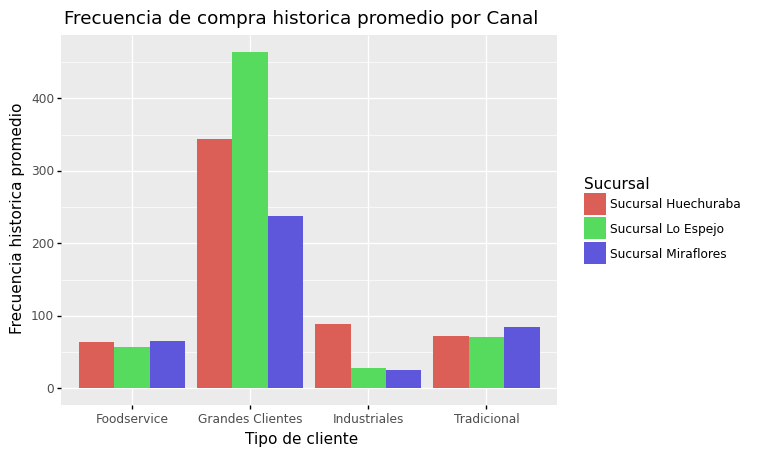

[<ggplot: (121098635918)>]

In [69]:
list_ggplot=[]
list_ggplot.append(ggplot(df.rename(columns={'Centro.1':'Sucursal'}),
                          aes(x='Tipo de cliente', y='Frecuencia historica promedio', fill='Sucursal'))
     
        + geom_col(position='dodge',show_legend=True)
                   
        +ggtitle('Frecuencia de compra historica promedio'+ ' por Canal')
                  )
list_ggplot

#### Frecuencia Anual 

In [70]:
#================================================
#La cantidad de compras promedio de cada cliente(Anualmente) por Canal.
#================================================

df=data.groupby(['Tipo de cliente','Año',
              'Cliente','Día natural'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Año','Cliente'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Año']).mean().reset_index()[['Año',
              'Tipo de cliente','Día natural']]#.head(20)
df.Año=df.Año.astype('category')
df=df.rename(columns={'Día natural':'Frecuencia de compra promedio'})
df.head()
#frecuencia promedio de cada año para cada Canal
#--------------------------------------------------

,Año,Tipo de cliente,Frecuencia de compra promedio
0,2018,Foodservice,32.721472
1,2019,Foodservice,27.730873
2,2020,Foodservice,19.808163
3,2021,Foodservice,19.123656
4,2018,Grandes Clientes,105.250000


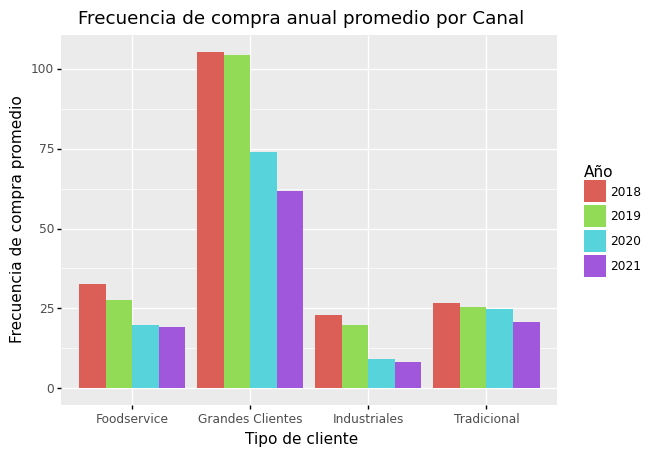

<ggplot: (121124648753)>

In [71]:
list_ggplot.append(ggplot(df,
                          aes(x='Tipo de cliente', y='Frecuencia de compra promedio', fill='Año'))
     
        + geom_col(position='dodge',show_legend=True)
                   
        +ggtitle('Frecuencia de compra anual promedio'+ ' por Canal')
                  )
list_ggplot[len(list_ggplot)-1]

##### Mensual

###### Paso a Paso 

In [72]:
"""
.reset_index().groupby([ 'Tipo de cliente','Mes','Cliente'
             ]).count()

.reset_index().groupby([ 'Tipo de cliente','Mes']).mean()

.reset_index()[['Mes','Tipo de cliente','Día natural']]#.head(20)
"""
data.groupby(['Tipo de cliente','Mes',
              'Cliente','Día natural']).count()


Zona de ventas  Zona de ventas.1  \
Tipo de cliente Mes Cliente  Día natural                                     
Foodservice     1   10013064 2021-01-13                1                 1   
                    10014397 2020-01-15                1                 1   
                             2021-01-09                2                 2   
                             2021-01-16                1                 1   
                             2021-01-23                1                 1   
...                                                  ...               ...   
Tradicional     12  9994662  2020-12-17                1                 1   
                    9994800  2020-12-16                1                 1   
                    9997223  2019-12-11                1                 1   
                             2020-12-09                1                 1   
                             2020-12-19                1                 1   

                                          Cliente.1  Cliente - Local  \
Tipo de cliente Mes Cliente  Día natural                               
Foodservice     1   10013064 2021-01-13           1                1   
                    10014397 2020-01-15           1                1   
                             2021-01-09           2                2   
                             2021-01-16           1                1   
                             2021-01-23           1                1   
...                                             ...              ...   
Tradicional     12  9994662  2020-12-17           1                1   
                    9994800  2020-12-16           1                1   
                    9997223  2019-12-11           1                1   
                             2020-12-09           1                1   
                             2020-12-19           1                1   

                                          Cliente - Local.1  Material  \
Tipo de cliente Mes Cliente  Día natural                                
Foodservice     1   10013064 2021-01-13                   1         1   
                    10014397 2020-01-15                   1         1   
                             2021-01-09                   2         2   
                             2021-01-16                   1         1   
                             2021-01-23                   1         1   
...                                                     ...       ...   
Tradicional     12  9994662  2020-12-17                   1         1   
                    9994800  2020-12-16                   1         1   
                    9997223  2019-12-11                   1         1   
                             2020-12-09                   1         1   
                             2020-12-19                   1         1   

                                          Kilos Venta KG  Venta Neta  \
Tipo de cliente Mes Cliente  Día natural                               
Foodservice     1   10013064 2021-01-13                1           1   
                    10014397 2020-01-15                1           1   
                             2021-01-09                2           2   
                             2021-01-16                1           1   
                             2021-01-23                1           1   
...                                                  ...         ...   
Tradicional     12  9994662  2020-12-17                1           1   
                    9994800  2020-12-16                1           1   
                    9997223  2019-12-11                1           1   
                             2020-12-09                1           1   
                             2020-12-19                1           1   

                                          Precio Promedio  \
Tipo de cliente Mes Cliente  Día natural                    
Foodservice     1   10013064 2021-01-13                 1   
                    

<AxesSubplot:>

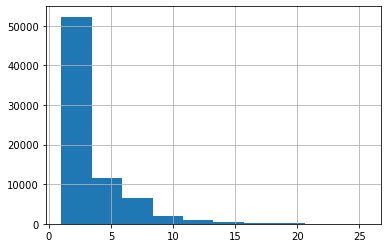

In [73]:
data.groupby(['Tipo de cliente','Mes','Cliente','Año'
              ,'Día natural']).count().reset_index().groupby([ 'Tipo de cliente','Mes','Cliente','Año'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Mes','Cliente'
             ]).mean().reset_index()['Día natural'].hist()

In [74]:
"""
.reset_index().groupby([ 'Tipo de cliente','Mes']).mean()

.reset_index()[['Mes','Tipo de cliente','Día natural']]#.head(20)
"""
df_x=data.groupby(['Tipo de cliente','Mes','Cliente','Año'
              ,'Día natural']).count().reset_index().groupby([ 'Tipo de cliente','Mes','Cliente','Año'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Mes','Cliente'
             ]).mean().reset_index().groupby([ 'Tipo de cliente','Mes'
             ]).mean().reset_index()[['Mes','Tipo de cliente','Día natural']]#.head(20)
df_x#[df_x['Tipo de cliente']=='Grandes Clientes']

,Mes,Tipo de cliente,Día natural
0,1,Foodservice,2.986713
1,2,Foodservice,2.863542
2,3,Foodservice,2.992364
3,4,Foodservice,2.907955
4,5,Foodservice,2.895037
5,6,Foodservice,2.907112
6,7,Foodservice,3.044369
7,8,Foodservice,3.232858
8,9,Foodservice,2.906169
9,10,Foodservice,2.974625


In [75]:
"""
.reset_index()[['Mes','Tipo de cliente','Día natural']]#.head(20)
"""
data.groupby(['Tipo de cliente','Mes',
              'Cliente','Día natural']).count().reset_index().groupby([ 'Tipo de cliente','Mes','Cliente'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Mes']).mean()


Día natural  Zona de ventas  Zona de ventas.1  \
Tipo de cliente  Mes                                                  
Foodservice      1       7.204068        7.204068          7.204068   
                 2       6.739386        6.739386          6.739386   
                 3       6.999389        6.999389          6.999389   
                 4       6.146857        6.146857          6.146857   
                 5       6.346486        6.346486          6.346486   
                 6       6.342735        6.342735          6.342735   
                 7       6.701365        6.701365          6.701365   
                 8       7.299609        7.299609          7.299609   
                 9       6.566298        6.566298          6.566298   
                 10      6.993258        6.993258          6.993258   
                 11      6.097627        6.097627          6.097627   
                 12      6.164642        6.164642          6.164642   
Grandes Clientes 1      30.157895       30.157895         30.157895   
                 2      28.710526       28.710526         28.710526   
                 3      32.600000       32.600000         32.600000   
                 4      28.150000       28.150000         28.150000   
                 5      28.894737       28.894737         28.894737   
                 6      27.024390       27.024390         27.024390   
                 7      29.463415       29.463415         29.463415   
                 8      29.925000       29.925000         29.925000   
                 9      26.157895       26.157895         26.157895   
                 10     26.463415       26.463415         26.463415   
                 11     22.263158       22.263158         22.263158   
                 12     21.894737       21.894737         21.894737   
Industriales     1       5.714286        5.714286          5.714286   
                 2       3.800000        3.800000          3.800000   
                 3       4.285714        4.285714          4.285714   
                 4       4.333333        4.333333          4.333333   
                 5       4.428571        4.428571          4.428571   
                 6       3.000000        3.000000          3.000000   
                 7       3.083333        3.083333          3.083333   
                 8       4.000000        4.000000          4.000000   
                 9       3.750000        3.750000          3.750000   
                 10      4.461538        4.461538          4.461538   
                 11      5.000000        5.000000          5.000000   
                 12      4.300000        4.300000          4.300000   
Tradicional      1       7.874939        7.874939          7.874939   
                 2       7.103540        7.103540          7.103540   
                 3       8.408970        8.408970          8.408970   
                 4       7.997014        7.997014          7.997014   
                 5       7.800655        7.800655          7.800655   
                 6       7.952660        7.952660          7.952660   
                 7       8.282147        8.282147          8.282147   
                 8       8.562879        8.562879          8.562879   
                 9       7.524201        7.524201          7.524201   
                 10      8.032939        8.032939          8.032939   
                 11      6.763785        6.763785          6.763785   
                 12      6.759313        6.759313          6.759313   

                      Cliente.1  Cliente - Local  Cliente - Local.1  \
Tipo de cliente  Mes                                                  
Foodservice      1     7.204068         7.204068           7.204068   
                 2     6.739386         6.739386           6.739386   
                 3     6.999389         6.999389           6.999389   
                 4     6.146857         6.146857           6.146857   
                 5     6.346486         6.346

In [76]:
"""
#.head(20)
"""
data.groupby(['Tipo de cliente','Mes',
              'Cliente','Día natural']).count().reset_index().groupby([ 'Tipo de cliente','Mes','Cliente'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Mes']).mean().reset_index()[['Mes','Tipo de cliente','Día natural']]


,Mes,Tipo de cliente,Día natural
0,1,Foodservice,7.204068
1,2,Foodservice,6.739386
2,3,Foodservice,6.999389
3,4,Foodservice,6.146857
4,5,Foodservice,6.346486
5,6,Foodservice,6.342735
6,7,Foodservice,6.701365
7,8,Foodservice,7.299609
8,9,Foodservice,6.566298
9,10,Foodservice,6.993258


###### Aplicación 

In [77]:
#================================================
#La cantidad de compras promedio de cada cliente(Anualmente) por Canal.
#================================================

df=data.groupby(['Tipo de cliente','Mes','Cliente','Año'
              ,'Día natural']).count().reset_index().groupby([ 'Tipo de cliente','Mes','Cliente','Año'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Mes','Cliente'
             ]).mean().reset_index().groupby([ 'Tipo de cliente','Mes'
             ]).mean().reset_index()[['Mes','Tipo de cliente','Día natural']]#.head(20)#.head(20)
df.Mes=df.Mes.apply(lambda x: Mes_name(x))
df=df.rename(columns={'Día natural':'Frecuencia de compra promedio'})
df.head()
#frecuencia promedio de cada año para cada Canal
#--------------------------------------------------

,Mes,Tipo de cliente,Frecuencia de compra promedio
0,Enero,Foodservice,2.986713
1,Febrero,Foodservice,2.863542
2,Marzo,Foodservice,2.992364
3,Abril,Foodservice,2.907955
4,Mayo,Foodservice,2.895037


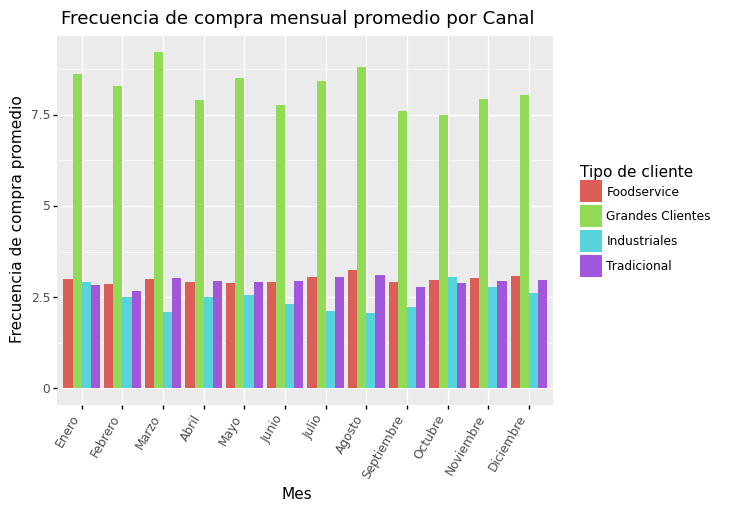

<ggplot: (121098586543)>

In [78]:
list_ggplot.append(ggplot(df,
            aes(x='Mes', y='Frecuencia de compra promedio', fill='Tipo de cliente'))
     
        + geom_col(position='dodge',show_legend=True)
                   
        +ggtitle('Frecuencia de compra mensual promedio'+ ' por Canal')

+ scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre'])
                     +theme(axis_text_x = element_text(angle=60, hjust=1))
                            #,figure_size=(15,8))
                  
                  
)
list_ggplot[len(list_ggplot)-1]

#### Por Material promedio Anual


posee Errores en el calculo, ya que no segmenta bien 

In [79]:
#======================
# SUCURSAL
#====================
data.groupby(['Tipo de cliente','Centro.1',
              'Cliente','Material','Día natural'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Centro.1','Cliente','Material'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Centro.1','Material']).mean()

Día natural  Zona de ventas  \
Tipo de cliente Centro.1            Material                                
Foodservice     Sucursal Huechuraba 1010002      7.595238        7.595238   
                                    1010048     32.501577       32.501577   
                                    1010077      4.384615        4.384615   
                                    1010078     23.991935       23.991935   
                                    1010267     47.307325       47.307325   
...                                                   ...             ...   
Tradicional     Sucursal Miraflores 1020010     20.570571       20.570571   
                                    1020013     25.092224       25.092224   
                                    1020027     25.609127       25.609127   
                                    1020042     16.669697       16.669697   
                                    1020253     13.299645       13.299645   

                                              Zona de ventas.1  Cliente.1  \
Tipo de cliente Centro.1            Material                                
Foodservice     Sucursal Huechuraba 1010002           7.595238   7.595238   
                                    1010048          32.501577  32.501577   
                                    1010077           4.384615   4.384615   
                                    1010078          23.991935  23.991935   
                                    1010267          47.307325  47.307325   
...                                                        ...        ...   
Tradicional     Sucursal Miraflores 1020010          20.570571  20.570571   
                                    1020013          25.092224  25.092224   
                                    1020027          25.609127  25.609127   
                                    1020042          16.669697  16.669697   
                                    1020253          13.299645  13.299645   

                                              Cliente - Local  \
Tipo de cliente Centro.1            Material                    
Foodservice     Sucursal Huechuraba 1010002          7.595238   
                                    1010048         32.501577   
                                    1010077          4.384615   
                                    1010078         23.991935   
                                    1010267         47.307325   
...                                                       ...   
Tradicional     Sucursal Miraflores 1020010         20.570571   
                                    1020013         25.092224   
                                    1020027         25.609127   
                                    1020042         16.669697   
                                    1020253         13.299645   

                                              Cliente - Local.1  \
Tipo de cliente Centro.1            Material                      
Foodservice     Sucursal Huechuraba 1010002            7.595238   
                                    1010048           32.501577   
                                    1010077            4.384615   
                                    1010078           23.991935   
                                    1010267           47.307325   
...                                                         ...   
Tradicional     Sucursal Miraflores 1020010           20.570571   
                                    1020013           25.092224   
                                    1020027           25.609127   
                                    1020042           16.669697   
                                    1020253           13.299645   

                                              Kilos Venta KG  Venta Neta  \
Tipo de cliente Centro.1            Material                               
Foodservice     Sucursal Huechuraba 1010002         7.595238    7.595238   
                                    1010048        32.501577   32.501577   
                    

In [80]:
#================================================
#Productos con más frecuencia de compra.
#================================================

df=DF_Full.groupby(['Tipo de cliente','Centro.1',
              'Cliente','Material Nombre','Año','Día natural'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Centro.1','Cliente','Material Nombre','Año'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Centro.1','Material Nombre','Año']).mean().reset_index()\
[[ 'Tipo de cliente','Centro.1','Material Nombre','Año','Día natural']]
df=df.rename(columns={'Día natural':'Frecuencia historica promedio'})
df.head()

,Tipo de cliente,Centro.1,Material Nombre,Año,Frecuencia historica promedio
0,Foodservice,Sucursal Huechuraba,1010002\n (Con Menudencia >2.130),2018,7.500000
1,Foodservice,Sucursal Huechuraba,1010002\n (Con Menudencia >2.130),2019,8.294118
2,Foodservice,Sucursal Huechuraba,1010002\n (Con Menudencia >2.130),2020,3.166667
3,Foodservice,Sucursal Huechuraba,1010002\n (Con Menudencia >2.130),2021,2.777778
4,Foodservice,Sucursal Huechuraba,1010048\n (Pechuga Entera Selección),2018,23.983740


In [81]:
#================================================
#Productos con más frecuencia de compra.
#================================================

df=DF_Full.groupby(['Tipo de cliente',
              'Cliente','Material Nombre','Año','Día natural'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Cliente','Material Nombre','Año'
             ]).count().reset_index().groupby([ 'Tipo de cliente','Material Nombre']).mean().reset_index()\
[[ 'Tipo de cliente','Material Nombre','Día natural']]
df=df.rename(columns={'Día natural':'Frecuencia de compra promedio'})
df.head()

,Tipo de cliente,Material Nombre,Frecuencia de compra promedio
0,Foodservice,1010002\n (Con Menudencia >2.130),7.754902
1,Foodservice,1010048\n (Pechuga Entera Selección),14.757779
2,Foodservice,1010077\n (Trutro Entero Selección),2.443936
3,Foodservice,1010078\n (Trutro Entero Selección),10.754182
4,Foodservice,1010267\n (Pechuga Desh S/calibre),18.983151


In [82]:
#==========
#Corregido
#=================
df=DF_Full.groupby(['Tipo de cliente',
              'Cliente','Material Nombre','Año','Día natural'
             ]).count()\
            .reset_index().groupby([ 'Tipo de cliente','Cliente','Material Nombre','Año']).count()\
           .reset_index().groupby([ 'Tipo de cliente','Material Nombre', 'Cliente']).mean()\
            .reset_index().groupby([ 'Tipo de cliente','Material Nombre']).mean()\
            .reset_index()[[ 'Tipo de cliente','Material Nombre','Día natural']]
df=df.rename(columns={'Día natural':'Frecuencia de compra promedio'})
df.head()

,Tipo de cliente,Material Nombre,Frecuencia de compra promedio
0,Foodservice,1010002\n (Con Menudencia >2.130),4.864332
1,Foodservice,1010048\n (Pechuga Entera Selección),10.284872
2,Foodservice,1010077\n (Trutro Entero Selección),2.059406
3,Foodservice,1010078\n (Trutro Entero Selección),8.097785
4,Foodservice,1010267\n (Pechuga Desh S/calibre),15.653053


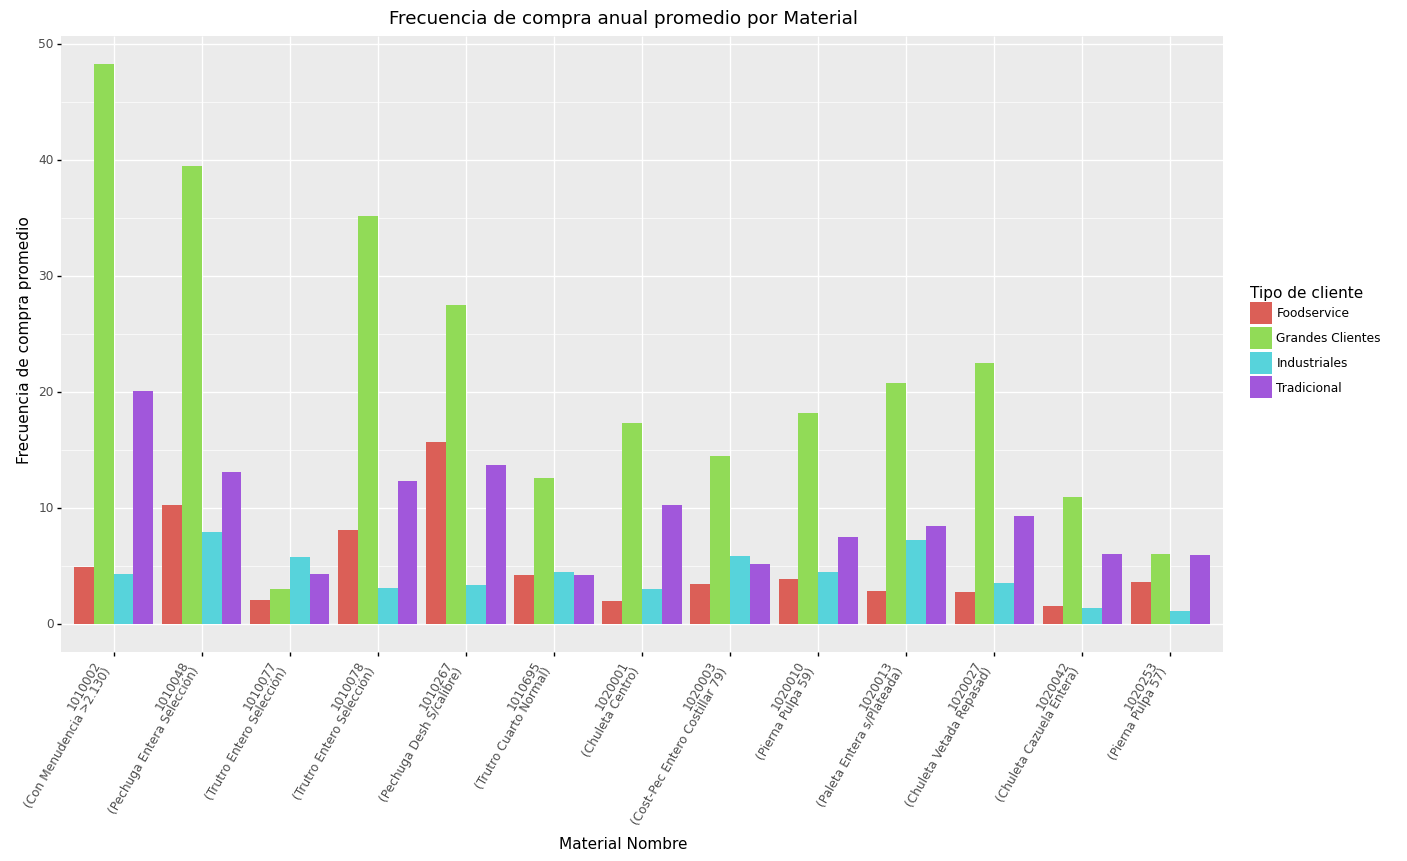

<ggplot: (121098795593)>

In [83]:
#list_ggplot=[]
list_ggplot.append(ggplot(df, aes(x='Material Nombre', y='Frecuencia de compra promedio', fill='Tipo de cliente'))
     
        + geom_col(position='dodge',show_legend=True)
                   
        +ggtitle('Frecuencia de compra anual promedio'+ ' por Material')
        
        +theme(axis_text_x = element_text(angle=60, hjust=1),figure_size=(15,8))
                  )
list_ggplot[len(list_ggplot)-1]

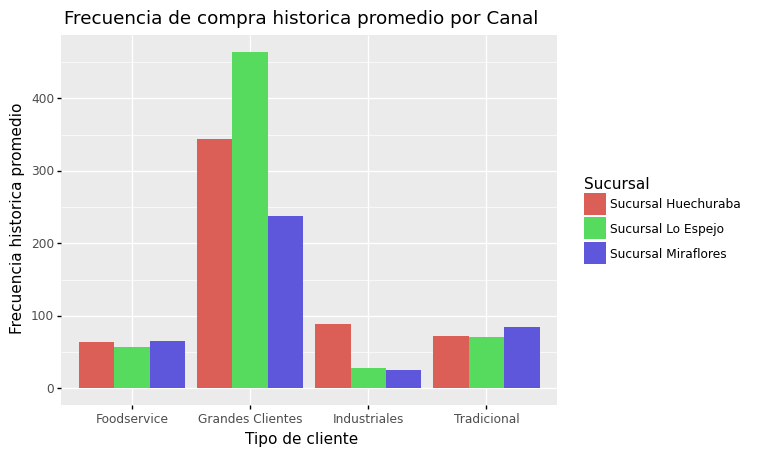

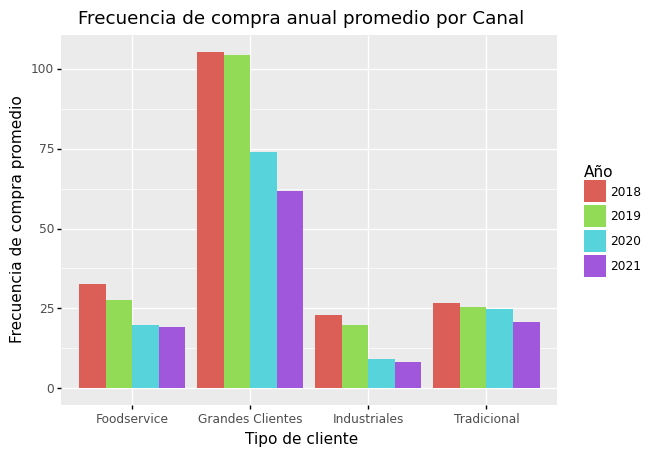

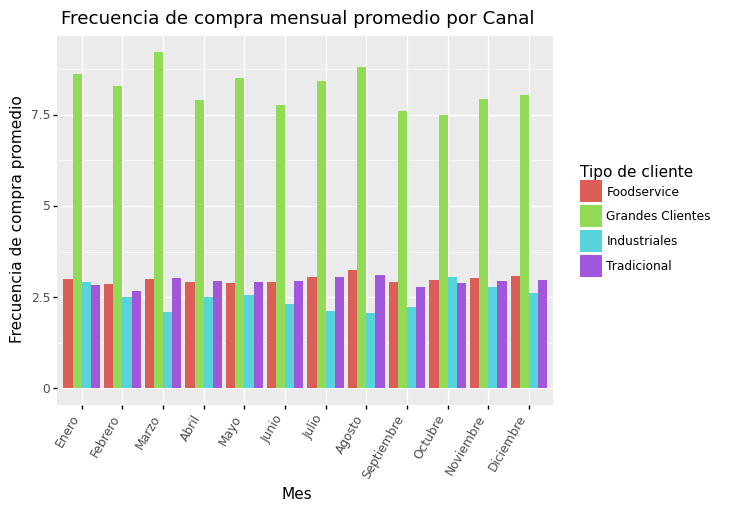

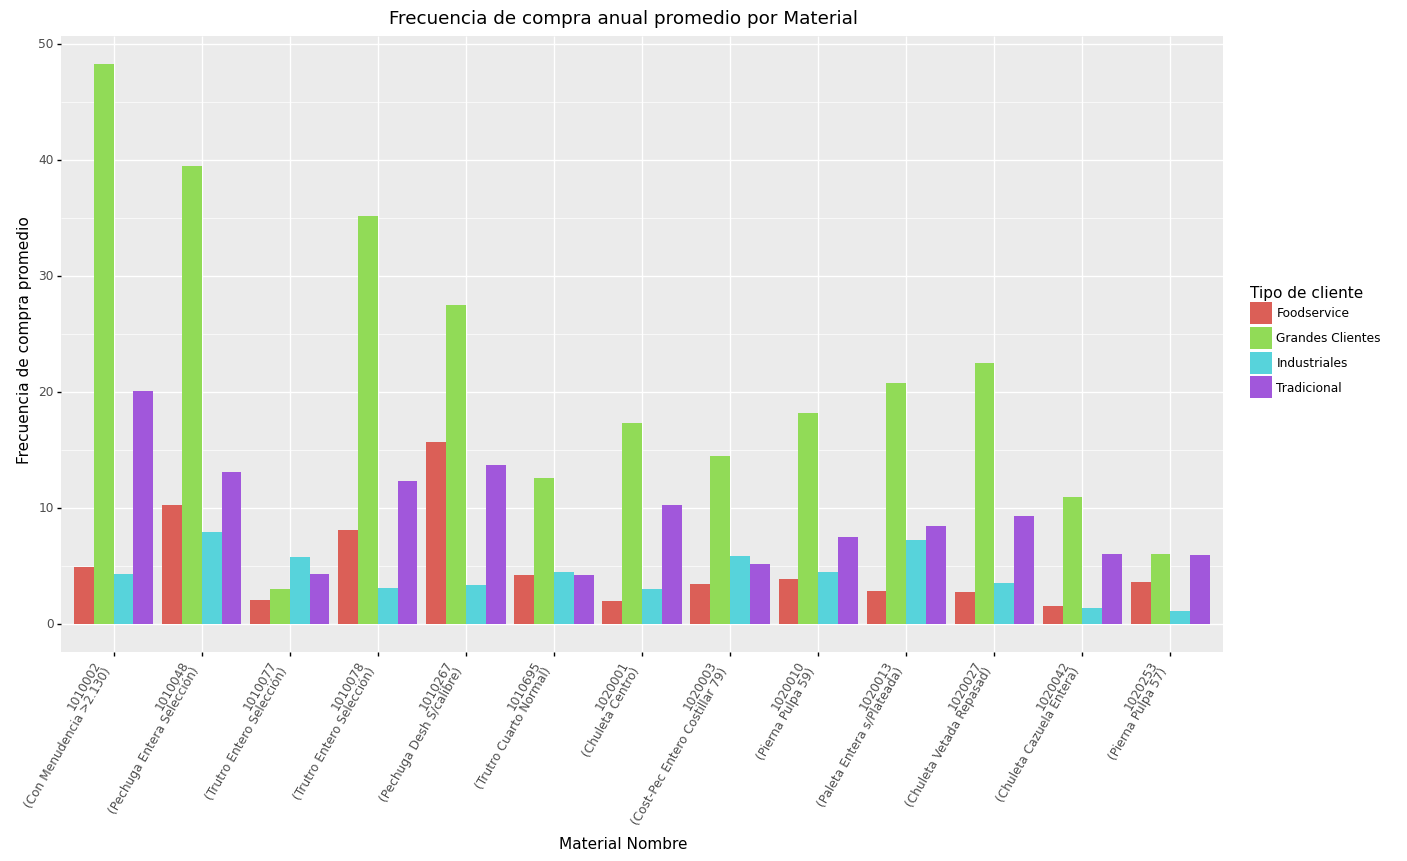

[<ggplot: (121098635918)>,
 <ggplot: (121124648753)>,
 <ggplot: (121098586543)>,
 <ggplot: (121098795593)>]

In [84]:
list_ggplot

#### PDF save 

In [85]:
save_as_pdf_pages(list_ggplot,file_direct_Graphic+'/Generales/'+"/Frecuencia de Compra.pdf")

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales//Frecuencia de Compra.pdf
